In [1]:
setwd("/content/sample_data")

In [9]:
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("devtools")
devtools::install_github("kassambara/factoextra")
library("FactoMineR")
library("factoextra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘viridis’, ‘ggsci’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Rcpp    (1.0.12 -> 1.0.13) [CRAN]
tinytex (0.51   -> 0.52  ) [CRAN]
xfun    (0.45   -> 0.46  ) [CRAN]


Installing 3 packages: Rcpp, tinytex, xfun

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp13iEpx/remotes11326384f72/kassambara-factoextra-1689fc7/DESCRIPTION’ ... OK
* preparing ‘factoextra’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘factoextra_1.0.7.999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [10]:
# Read the CSV file
df <- read.csv("fraud.csv")
head(df)

### response variable = 'fraud'   -> if it is a fraud or not

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,⋯,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,month,day,year
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>,<int>
1,1,46,M,1,85,38301,1,1,Rent,80006,⋯,7530.941,9,Compact,12885.45,white,16161.33,0,12,16,2016
2,3,21,F,0,75,30445,0,1,Rent,15021,⋯,2966.025,4,Large,29429.45,white,28691.96,0,2,12,2015
3,4,49,F,0,87,38923,0,1,Own,20158,⋯,6283.888,3,Compact,21701.18,white,22090.95,1,12,6,2016
4,5,58,F,1,58,40605,1,0,Own,15024,⋯,6169.748,4,Medium,13198.27,other,38329.58,1,5,5,2016
5,6,38,M,1,95,36380,1,0,Rent,50034,⋯,4541.387,7,Medium,38060.21,gray,25876.56,0,10,27,2015
6,7,56,F,0,72,40240,0,0,Own,50047,⋯,5388.645,4,Medium,17688.20,black,15234.08,1,11,16,2016


In [143]:
numerical_features <- c("safty_rating","past_num_of_claims","liab_prct","age_of_vehicle","vehicle_price","vehicle_weight","month","year","age_of_driver","annual_income","claim_est_payout","day" )
all_features <- colnames(df)
categorical_features <- setdiff(all_features, numerical_features)

categorical_features <- setdiff(categorical_features, "fraud")
categorical_features <- setdiff(categorical_features, "claim_number")
categorical_features <- union(categorical_features, "zip_code")
print("Numerical features:")
print(numerical_features)

print('---------------------------------------------------------------')

print("Categorical features:")
print(categorical_features)

[1] "Numerical features:"
 [1] "safty_rating"       "past_num_of_claims" "liab_prct"         
 [4] "age_of_vehicle"     "vehicle_price"      "vehicle_weight"    
 [7] "month"              "year"               "age_of_driver"     
[10] "annual_income"      "claim_est_payout"   "day"               
[1] "---------------------------------------------------------------"
[1] "Categorical features:"
 [1] "gender"                  "marital_status"         
 [3] "high_education_ind"      "address_change_ind"     
 [5] "living_status"           "zip_code"               
 [7] "claim_day_of_week"       "accident_site"          
 [9] "witness_present_ind"     "channel"                
[11] "policy_report_filed_ind" "vehicle_category"       
[13] "vehicle_color"          


In [12]:
##########  Here we have a mixed type data set as it cotains both numerical and categorical variables .But we can apply PCA only for numerical variables as it is all
##  about capturing maximum amount  variation of our original data set .
##   So lets apply PCA for our numerical variables

# Principle Component Analysis for numerical features

In [144]:
pca <- PCA(df[numerical_features],scale.unit = TRUE, graph = TRUE)    ## scale.unit = TRUE  (In order to remove the impact of  the  scale of each individual variable we do standardize the data)
  # graph = TRUE   -> To produce the  scree plot , individual factor map , variables factor map , byplot )

In [145]:
pca

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 17998 individuals, described by 12 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard erro

In [146]:
### Now lets see the eigen values and the explained variance ratio of each principle component
eig.val <- get_eigenvalue(pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,1.91034768,15.9195640,15.91956
Dim.2,1.03438639,8.6198866,24.53945
Dim.3,1.02905333,8.5754444,33.11490
Dim.4,1.02575460,8.5479550,41.66285
Dim.5,1.01536085,8.4613404,50.12419
Dim.6,0.99949889,8.3291574,58.45335
Dim.7,0.99331145,8.2775954,66.73094
Dim.8,0.98431808,8.2026507,74.93359
Dim.9,0.98300453,8.1917044,83.12530
Dim.10,0.97330162,8.1108469,91.23615


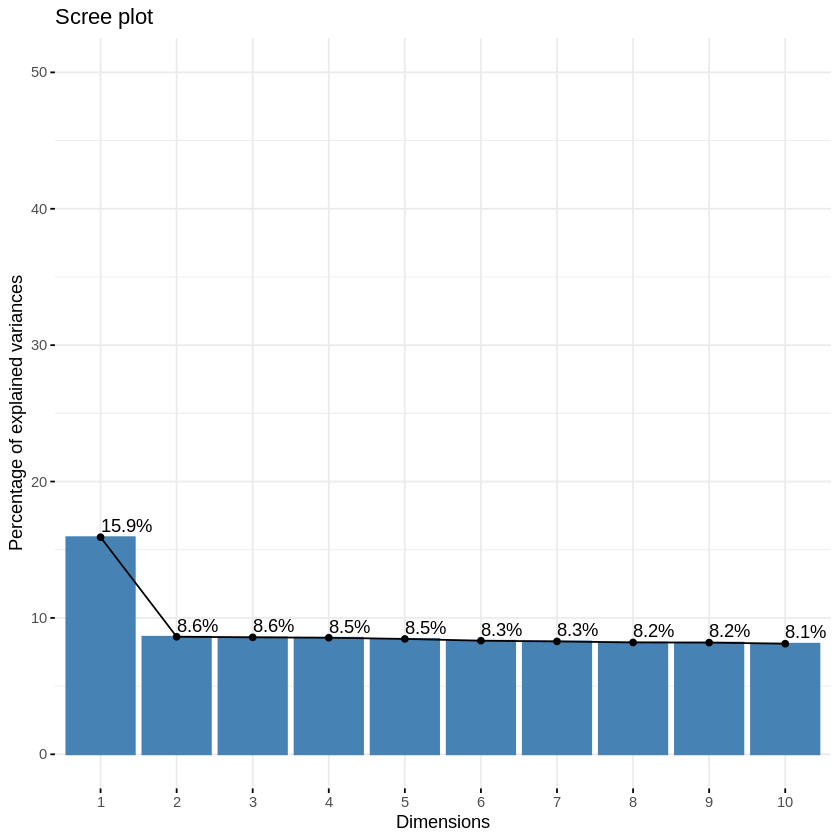

In [147]:
#### Now lets draw the scree plot
fviz_eig(pca, addlabels = TRUE, ylim = c(0, 50))

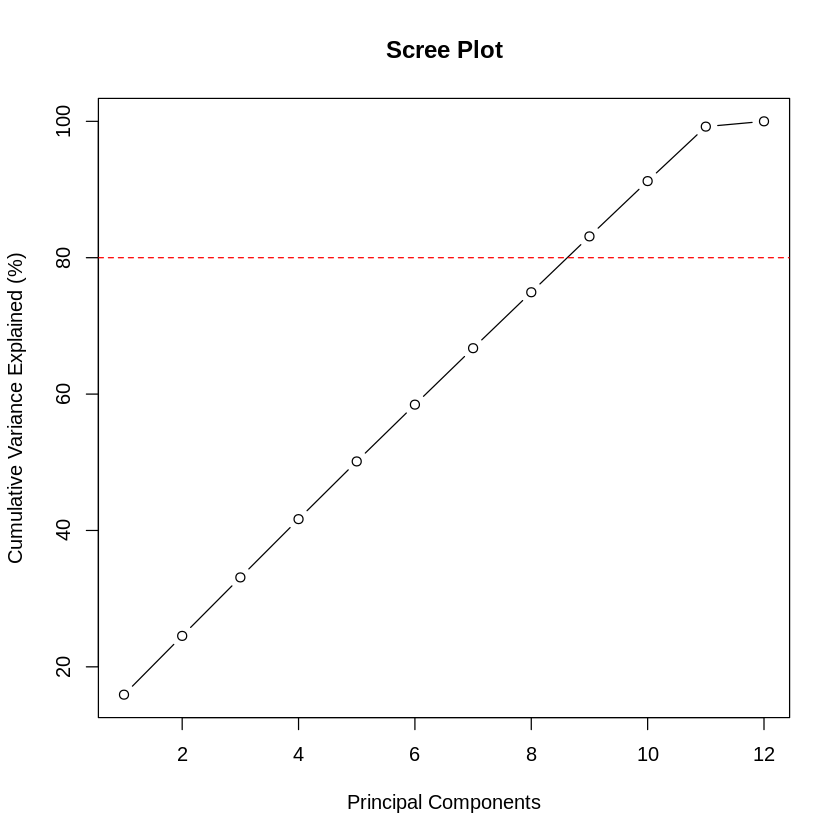

In [148]:
########  Now to decide how many PCs to retain , lets get the plot of cumulative explained variance
eigenvalues <- pca$eig

# Compute the cumulative variance explained
cumulative_variance <- cumsum(eigenvalues[, 2])

# Plot the scree plot with cumulative variance
plot(1:length(cumulative_variance), cumulative_variance, type = "b", xlab = "Principal Components", ylab = "Cumulative Variance Explained (%)", main = "Scree Plot")
abline(h = 80, col = "red", lty = 2)  # Optional: Add a horizontal line at 80% for reference

In [149]:
#### So according to the above plot , we can clearly see that  the first 10Pcs together explain 80% of the total variation .
## So we can stick to either 10 or 11 PCs without using all the 14 original variables .

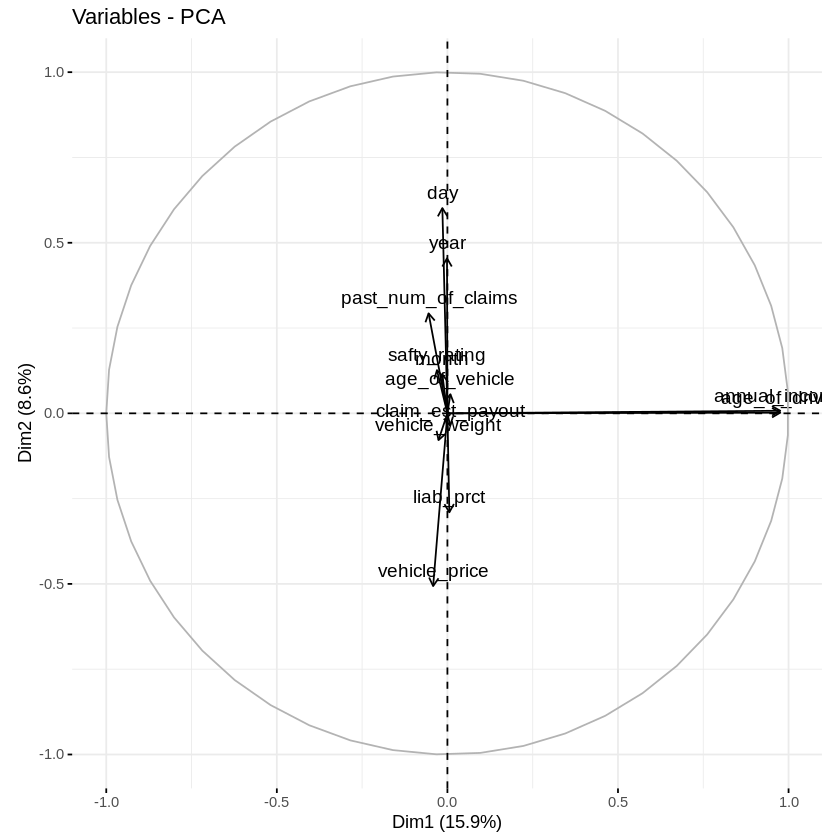

In [154]:
#############################################################################################################################
#############################################################################################################################
####################################   Correlation circle   ##################################################################

## A correlation circle (or variables factor map) is a graphical representation in PCA that displays the correlations between the original variables and the principal
## components (PCs). It helps to understand the relationships between the variables and how they contribute to the principal components.

# Each arrow represents an original variable.
# The direction and length of the arrow indicate how strongly the variable is correlated with the PCs.
# Longer arrows indicate stronger contributions to the PCs.
# Variables pointing in the same direction are positively correlated.
## Variables pointing in opposite directions are negatively correlated.
# Variables at right angles are uncorrelated.
fviz_pca_var(pca, col.var = "black")


In [155]:
#############################################################################################################################
##########################      Interpretation of the correlation circle plot     ###########################################


### Dim1 (15.9%): The first dimension explains 15.9% of the variance in the data.
### Dim2 (8.6%): The second dimension explains 8.6% of the variance in the data.

## Variable Contributions:
# annual_income: This variable has the longest vector along Dim1, indicating it contributes significantly to the first principal component and is highly correlated with it.
# day, year, past_num_of_claims, safety_rating, age_of_vehicle, claim_est_payout, vehicle_weight, liab_prct, and vehicle_price: These variables have shorter vectors, indicating they contribute less to Dim1 and Dim2. However, their directions suggest varying degrees of correlation with these dimensions.
# Correlations and Groupings:

# Variables pointing in the same direction are positively correlated. For example, day and year are closely aligned, suggesting a positive correlation.
# Variables pointing in opposite directions are negatively correlated. For example, annual_income has a direction opposite to many of the other variables, indicating a negative correlation.
# Variables perpendicular to each other are uncorrelated.
# Interpretation of Axes:

# Dim1 appears to be primarily influenced by annual_income.
# Dim2 captures variance associated with variables like day, year, and past_num_of_claims, though to a lesser extent compared to annual_income's influence on Dim1.

###Variable Relationships:
# annual_income has a strong influence on the first principal component (Dim1), suggesting it captures a significant aspect of the variance.
# day, year, and past_num_of_claims are more closely aligned with Dim2, indicating they capture a different aspect of the variance compared to annual_income.

In [171]:
######## Correlation Matrix #######
df_numerical <- df[, numerical_features]
correlation_matrix <- cor(df_numerical, use = "complete.obs") # use="complete.obs" ensures that pairwise complete observations are used
correlation_matrix

,safty_rating,past_num_of_claims,liab_prct,age_of_vehicle,vehicle_price,vehicle_weight,month,year,age_of_driver,annual_income,claim_est_payout,day
safty_rating,1.000000000,0.011475010,0.0045640729,0.009575315,-0.007129525,-0.0032193020,0.0135076704,-0.014051486,-0.017472274,-0.010766510,0.0062917505,0.0051650339
past_num_of_claims,0.011475010,1.000000000,-0.0014350439,0.005530678,-0.001025256,0.0015358571,0.0057973913,0.012627272,-0.024350897,-0.026719795,0.0062710149,0.0026227971
liab_prct,0.004564073,-0.001435044,1.0000000000,0.002516415,0.016695243,0.0003466772,-0.0016050857,0.008344864,0.003557870,0.002247235,0.0112028029,-0.0083459084
age_of_vehicle,0.009575315,0.005530678,0.0025164148,1.000000000,-0.006682206,-0.0037339777,0.0036289314,-0.003679709,0.003942228,0.004436754,-0.0026071873,-0.0045425065
vehicle_price,-0.007129525,-0.001025256,0.0166952428,-0.006682206,1.000000000,0.0108522527,0.0121301539,-0.007013393,-0.019053812,-0.020064082,0.0029061413,-0.0133634210
vehicle_weight,-0.003219302,0.001535857,0.0003466772,-0.003733978,0.010852253,1.0000000000,0.0127648255,0.006587251,-0.011288027,-0.012396147,-0.0070933959,-0.0025233978
month,0.013507670,0.005797391,-0.0016050857,0.003628931,0.012130154,0.0127648255,1.0000000000,0.007079650,-0.006121522,-0.006056099,-0.0009281015,0.0062955589
year,-0.014051486,0.012627272,0.0083448635,-0.003679709,-0.007013393,0.0065872510,0.0070796502,1.000000000,-0.002954165,0.002417921,0.0015660933,0.0208312676
age_of_driver,-0.017472274,-0.024350897,0.0035578699,0.003942228,-0.019053812,-0.0112880267,-0.0061215219,-0.002954165,1.000000000,0.907017934,0.0035648177,-0.0083660245
annual_income,-0.010766510,-0.026719795,0.0022472349,0.004436754,-0.020064082,-0.0123961466,-0.0060560988,0.002417921,0.907017934,1.000000000,0.0044338873,-0.0055440718


In [ ]:
#########   It is obviuos that the variables that are suggested as correlated by circle correlations plot are not correlated in the original feature spce .So
## the reuslts of circle  correlation plots are valid in that reduced space.
##

In [ ]:
#############################################################################################################################################
#########################################    Quality of representation   ####################################################################

# The quality of representation of the variables on factor map is called cos2 (square cosine, squared coordinates) . You can access to the cos2 as follow:

## The quality of representation of a variable on a principal component is measured by the squared cosine (cos²) of the angle between the variable
# vector and the axis of the principal component. This measure, also known as cos², indicates how well a variable is represented by the principal components.

# cos² values: Range from 0 to 1, where:
# Values close to 1 indicate that the variable is well represented by the principal component.
# Values close to 0 indicate that the variable is poorly represented by the principal component.
# This helps us  in assessing how well each variable is represented in the reduced dimension space and also help us to get an
# idea about  which variables contribute the most to the principal components and which might be less important.

In [176]:
var <- get_pca_var(pca)


In [177]:
head(var$cos2, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
safty_rating,9.392007e-04,0.016029480,0.0137216963,0.43012590,0.024166336
past_num_of_claims,3.043056e-03,0.085855636,0.0835932739,0.06736815,0.008362543
liab_prct,3.194558e-05,0.084109375,0.1453162872,0.01025696,0.209843762
age_of_vehicle,7.651426e-05,0.003125349,0.0004485987,0.19997324,0.026900825


In [178]:
var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
safty_rating,9.392007e-04,1.602948e-02,0.0137216963,4.301259e-01,0.0241663356
past_num_of_claims,3.043056e-03,8.585564e-02,0.0835932739,6.736815e-02,0.0083625432
liab_prct,3.194558e-05,8.410938e-02,0.1453162872,1.025696e-02,0.2098437620
age_of_vehicle,7.651426e-05,3.125349e-03,0.0004485987,1.999732e-01,0.0269008252
vehicle_price,1.750182e-03,2.563462e-01,0.1764301251,1.371654e-02,0.0005669158
vehicle_weight,6.831058e-04,6.142327e-03,0.1633288765,7.586444e-02,0.1665164906
month,2.212386e-04,1.296280e-02,0.2763429480,1.549397e-02,0.1773688883
year,1.338991e-06,2.064778e-01,0.1279900422,1.265669e-01,0.0777903981
age_of_driver,9.516845e-01,3.996019e-06,0.0007193276,4.339420e-05,0.0001384881
annual_income,9.516324e-01,5.781338e-05,0.0007795475,8.101417e-05,0.0001223698


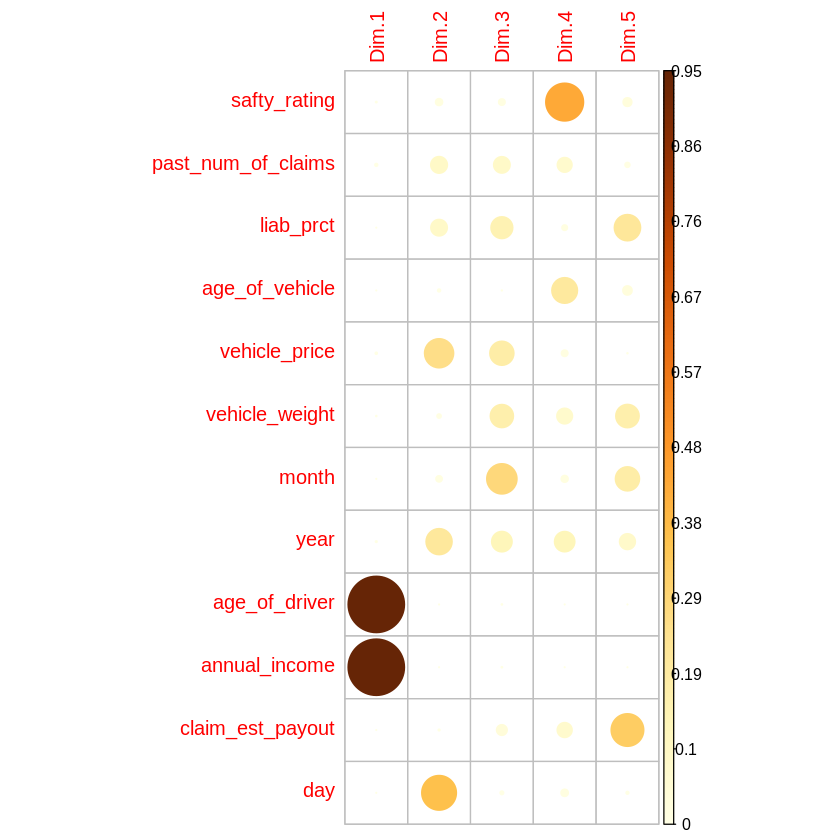

In [179]:
corrplot(var$cos2, is.corr=FALSE)


########### Generic way of interpreting correlation plots ############
### Axes and Labels:
# The plot has rows representing variables (as in our case , claim_number, safety_rating, age_of_driver, etc.).
# The columns represent the dimensions or principal components (e.g., Dim.1, Dim.2, etc.).
# The color and size of the circles indicate the cos² values, which measure the quality of representation of the variables on the principal components.

###  Color and Size:
# Darker and larger circles represent higher cos² values, indicating better representation of the variable on that principal component.
# Lighter and smaller circles represent lower cos² values, indicating poorer representation.


In [24]:
################# Intepretation of the above correlation plot ###################

##### Dim.1:
# Variables age_of_driver and annual_income have the highest cos² values (darkest and largest circles), indicating that these variables are well represented on the first principal component.
# Other variables like claim_number, vehicle_price, and vehicle_weight have moderate cos² values, indicating moderate representation on Dim.1.

##### Dim.2:
# safety_rating and vehicle_weight have notable cos² values, indicating they are relatively well represented on the second principal component.
# Most other variables have low cos² values on Dim.2, suggesting they are not well captured by this dimension.

### Dim.3, Dim.4, Dim.5:
# Generally, most variables have low cos² values on these dimensions, suggesting that these dimensions do not capture significant information from these variables.
# vehicle_price has a notable cos² value on Dim.4, indicating it is somewhat represented by this component.


## By looking at that plot , we can make the following conclustions regarding the importance of features ,
# age_of_driver and annual_income: These variables are the most important for Dim.1, meaning the first principal component captures a significant amount of information about these variables.
# safety_rating and vehicle_weight: These variables are somewhat important for Dim.2, indicating that the second principal component captures some information about these variables.




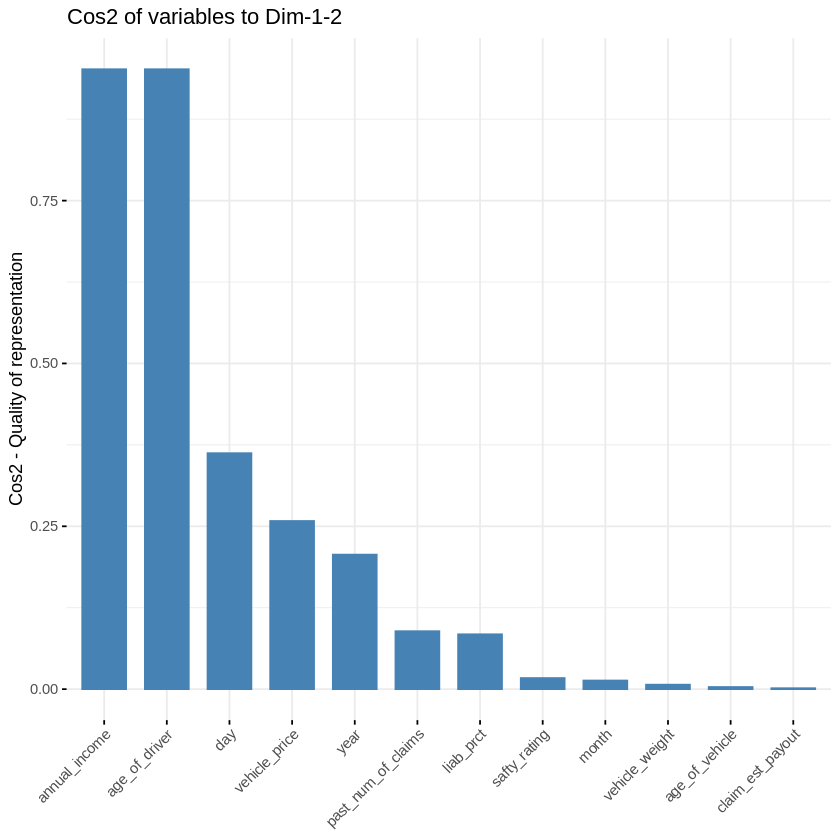

In [158]:
###################################  Contribution of each variable into first 2 PCs ############################################################
##################################################################################################################################################
# The function fviz_cos2 from the factoextra package in R visualizes the squared cosine (cos²) values of the variables for specified principal components.
#  When we  use the command fviz_cos2(pca, choice = "var", axes = 1:2), it generates a plot showing the quality of representation of each variable on the
# first two principal components (Dim.1 and Dim.2).
fviz_cos2(pca, choice = "var", axes = 1:2)

In [159]:
##################    Intepretation of above plot   ###############


##The cos² value for a variable on a principal component indicates how well the variable is represented by that component.
# Higher cos² values (close to 1) mean better representation, while lower values (close to 0) mean poorer representation.

#####  Axes 1 and 2:
#The axes = 1:2 parameter indicates that the plot should show the cos² values for the first two principal components (Dim.1 and Dim.2).
# The x-axis represents the variables.
# The y-axis represents the cos² values for Dim.1 and Dim.2.
# High cos² Values: Variables with high cos² values on Dim.1 and Dim.2 are well represented by these components. This means that these components capture most of
# the variability in these variables.
# Low cos² Values: Variables with low cos² values are not well represented by Dim.1 and Dim.2. These variables might be better represented by other components or
#  may not be well captured by the PCA model.
# Example Interpretation


#############  According to the above plot
###  We can conclude that the first 2 pcs together can capture a significant amount of variations of  ,  'age_of_driver' , 'annual_income', 'vehicle_price'
## variables where those 2 components could not  explain that much of variability of the rest of the numerical variables .

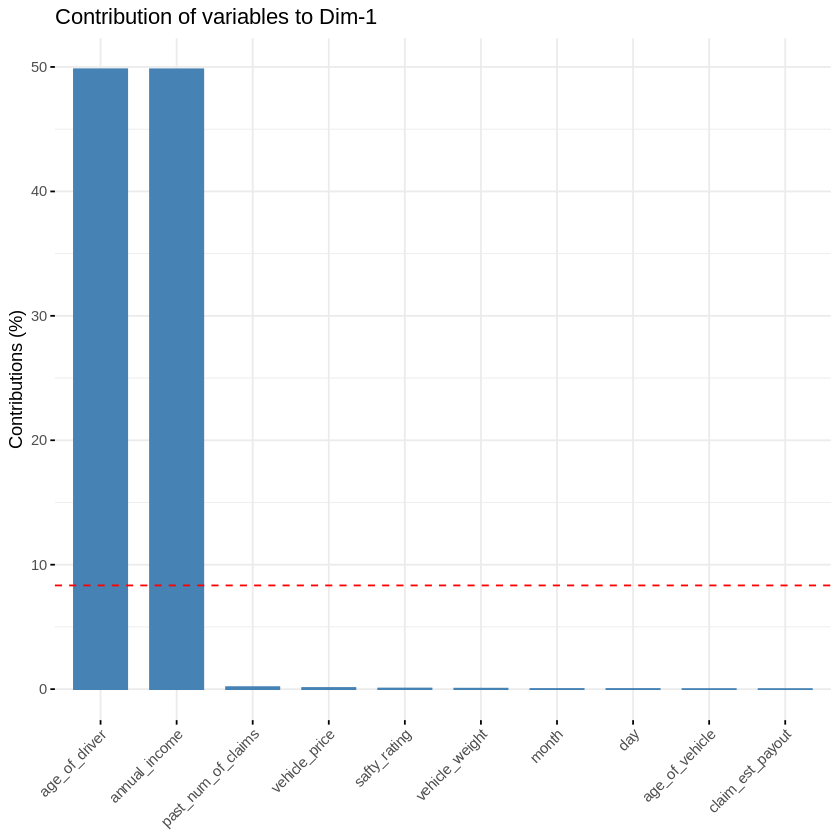

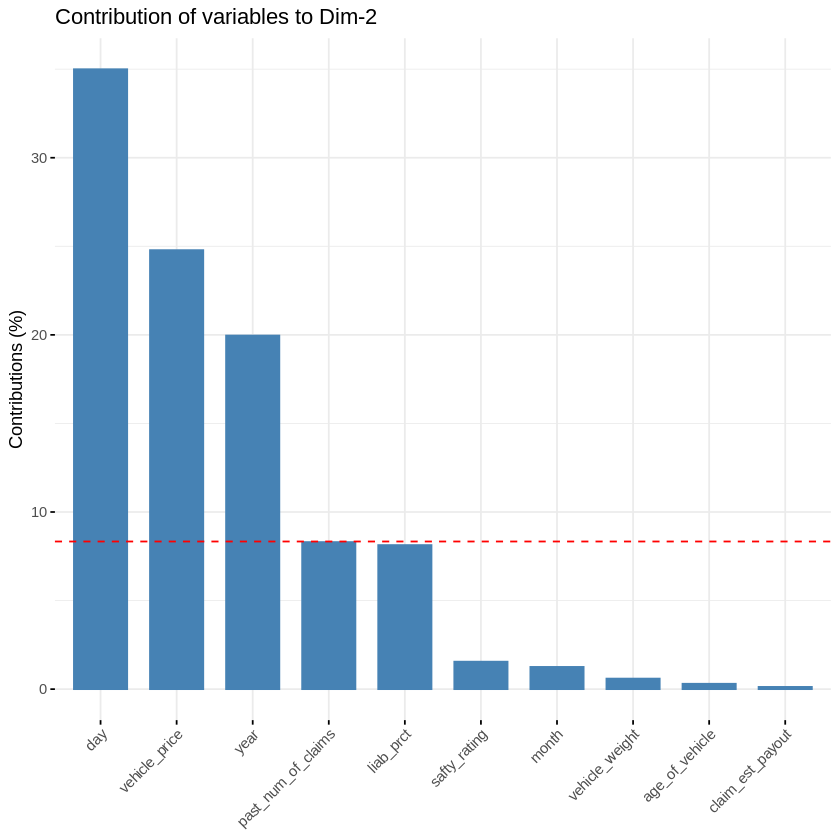

In [161]:
###################  We can also plot the contribution of each variable into specific PCs ###############
fviz_contrib(pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(pca, choice = "var", axes = 2, top = 10)

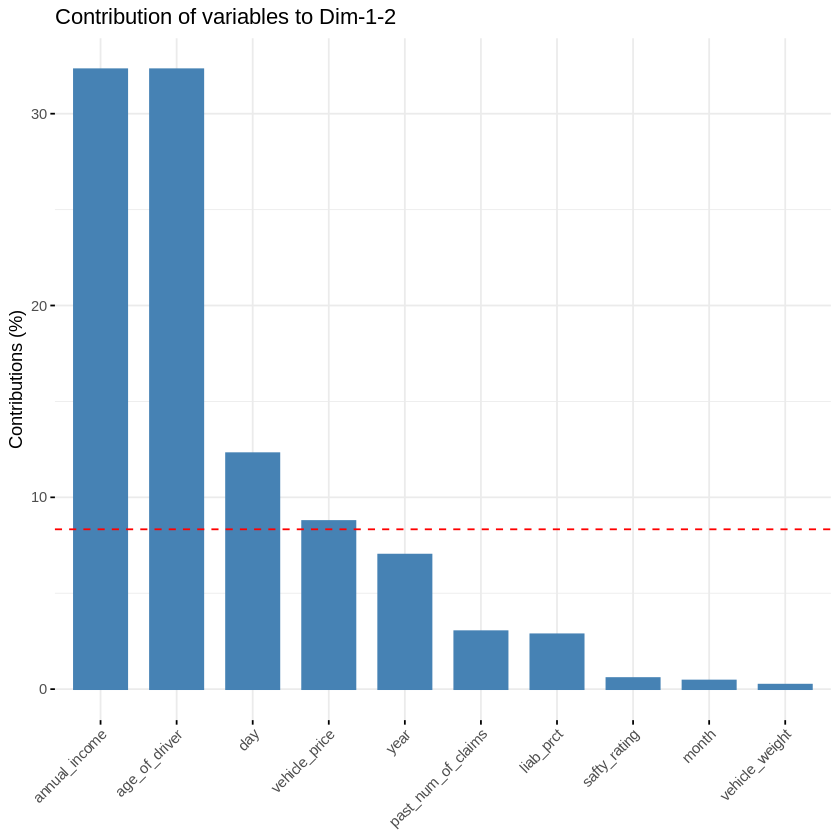

In [162]:
# The total contribution to PC1 and PC2 is obtained with the following R code:
fviz_contrib(pca, choice = "var", axes = 1:2, top = 10)

In [163]:
## The red dashed line on the graph above indicates the expected average contribution. If the contribution
## of the variables were uniform, the expected value would be 1/length(variables) = 1/10 = 10%. For a
## given component, a variable with a contribution larger than this cutoff could be considered as important
## in contributing to the component.

# Note that, the total contribution of a given variable, on explaining the variations retained by two
# principal components, say PC1 and PC2, is calculated as contrib = [(C1 * Eig1) + (C2 * Eig2)]/(Eig1 +
# Eig2), where C1 and C2 are the contributions of the variable on PC1 and PC2, respectively
# Eig1 and Eig2 are the eigenvalues of PC1 and PC2, respectively. Recall that eigenvalues measure
# the amount of variation retained by each PC.
# In this case, the expected average contribution (cutoff) is calculated as follow: As mentioned above, if
# the contributions of the 10 variables were uniform, the expected average contribution on a given PC
# would be 1/10 = 10%. The expected average contribution of a variable for PC1 and PC2 is : [(10* Eig1)+ (10 * Eig2)]/(Eig1 + Eig2)

In [164]:
########################## Correlation between variables and PCs ############################
# Description of dimension 2
# Description of dimension 1 and 2
res.desc <- dimdesc(pca, axes = c(1,2), proba = 0.05)
res.desc$Dim.1
res.desc$Dim.2


,correlation,p.value
age_of_driver,0.97554316,0.000000e+00
annual_income,0.97551646,0.000000e+00
day,-0.01478023,4.738575e-02
month,-0.01487409,4.599605e-02
vehicle_weight,-0.02613629,4.536792e-04
safty_rating,-0.03064638,3.920845e-05
vehicle_price,-0.04183517,1.970932e-08
past_num_of_claims,-0.05516390,1.304327e-13


,correlation,p.value
day,0.60165118,0.000000e+00
year,0.45439832,0.000000e+00
past_num_of_claims,0.29301132,0.000000e+00
safty_rating,0.12660758,3.336072e-65
month,0.11385428,5.360568e-53
age_of_vehicle,0.05590482,6.126428e-14
claim_est_payout,-0.03593668,1.418651e-06
vehicle_weight,-0.07837300,6.301815e-26
liab_prct,-0.29001616,0.000000e+00
vehicle_price,-0.50630642,0.000000e+00


In [165]:
###################  Get the scores ##############
head(var$contrib, 14)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
F,0.06600067,7.63840456,3.025261002,0.2066882,1.11122304
M,0.04400044,5.09226970,2.016840668,0.1377921,0.74081536
marital_status_0,1.87655488,0.02847066,1.179651645,5.0138707,0.71613496
marital_status_1,1.15904860,0.01758482,0.728608369,3.0968025,0.44231865
high_education_ind_0,0.11177246,0.26493634,7.882898646,4.8057570,1.16932610
high_education_ind_1,0.06386998,0.15139220,4.504513512,2.7461469,0.66818634
address_change_ind_0,2.31254585,5.48283977,0.030333058,1.6741537,0.58314068
address_change_ind_1,1.42833714,3.38645986,0.018735124,1.0340361,0.36017512
Own,7.08888563,3.01944499,0.023776198,1.1993474,0.77555927
Rent,5.90740470,2.51620416,0.019813498,0.9994562,0.64629939


In [168]:
#################################################################################################################################################
###############################    Integrate both  cos2  values with circle correlation plots   #################################################
#################################################################################################################################################

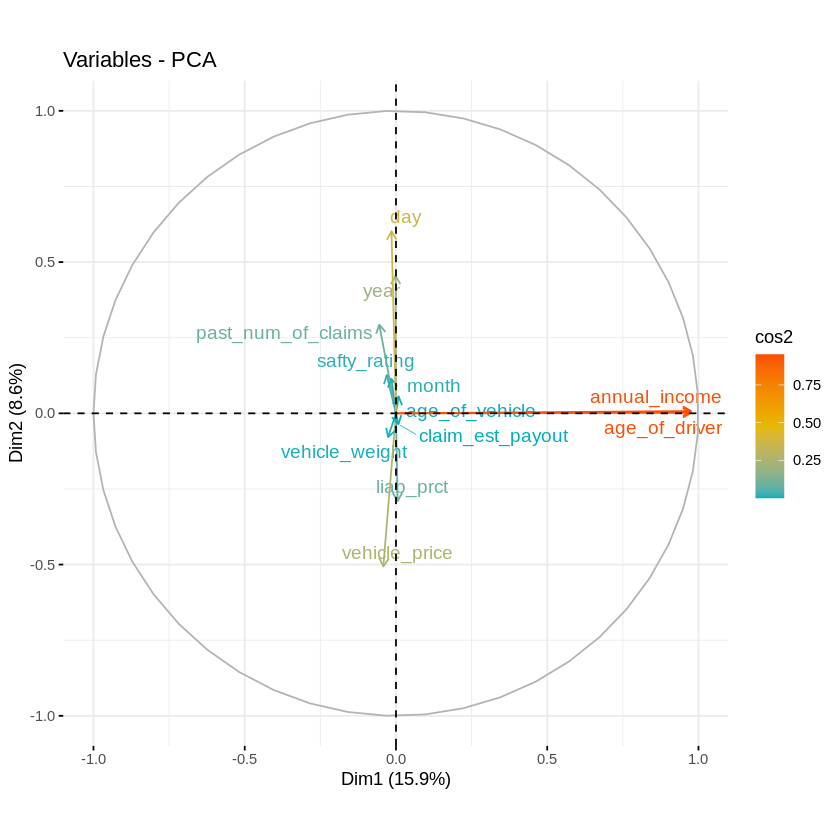

In [169]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(pca, col.var = "cos2",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE # Avoid text overlapping
)


In [ ]:
###############################################################################################################################################
##############################################    Graph of individuals (observations)   #########################################################
################################################################################################################################################
################################################################################################################################################
##################################################################################################################################################

In [ ]:
# The results, for individuals can be extracted using the function get_pca_ind() [factoextra package].
#  Similarly to the get_pca_var(), the function get_pca_ind() provides a list of matrices containing all the
#  results for the individuals (coordinates, correlation between variables and axes, squared cosine and
#  contributions)


In [47]:
ind <- get_pca_ind(pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

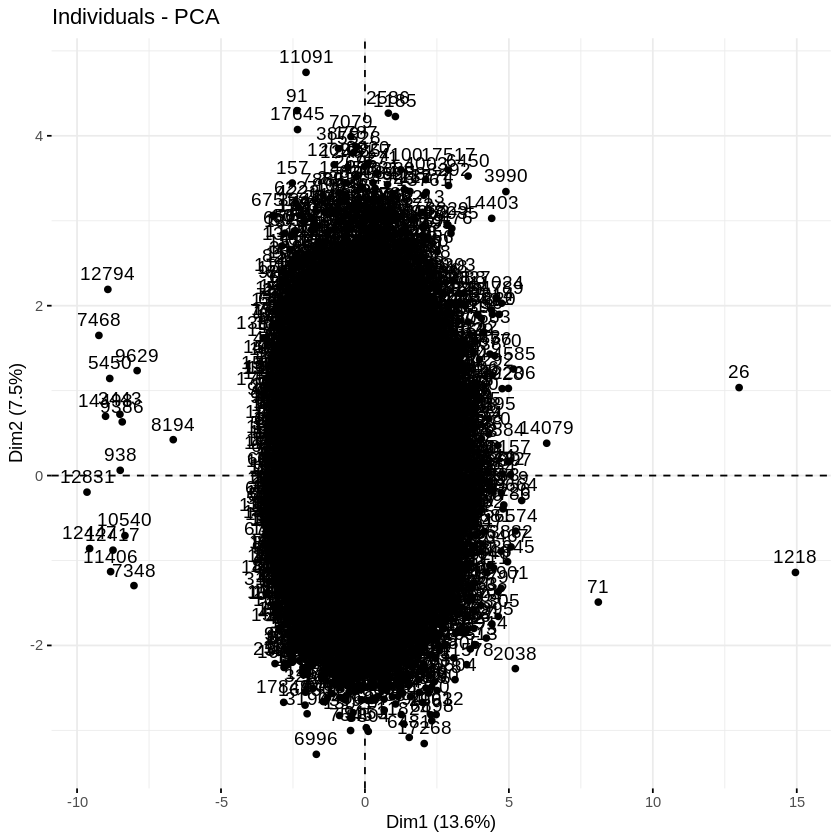

In [31]:

######################################## # Importance of clustering    #########################################
## Identifying clusters in machine learning is crucial because it enhances model accuracy, customization, and efficiency. Clustering groups similar
## data points together, enabling the development of specialized models tailored to each segment’s unique characteristics. This leads to improved accuracy by
## reducing variability within each cluster, better personalization through targeted approaches, and more efficient resource allocation. By creating distinct segments
## and applying models separately, businesses can gain deeper insights and make more informed, data-driven decisions, ultimately leading to better outcomes and increased
## effectiveness in applications such as marketing, customer service, and anomaly detection.


################### Not only for cluster identification , but it is also important to identify the outliers as well .
#### Usually when we have more than 2 variables , it is not possible to visualize our data combinining all of those variables together . But in PCA , we can use first 2 PCs
##  as axis and get the projection of original data into this reduced space . We can use that to visualize our data and then we can use it to identify the groups,clusters of
### our data set . We can also use that to identify the   outliers as well by using that same plot


fviz_pca_ind(pca)

## This plot typically shows the first two principal components (Dim.1 and Dim.2) on the x-axis and y-axis, respectively. These components are linear combinations of the original variables
##  that capture the maximum variance in the data.

# Each point on the plot represents an observation from the dataset. The coordinates of these points are the scores of the observations on the principal components.








In [ ]:
################## Here we can see that our plot is readable as we have huge amount of observations . But we can clealry see that while almost all the datat points
#  are scatterd in the center, there are few points which are far away from the center . That is an indication of the existence of clusters .



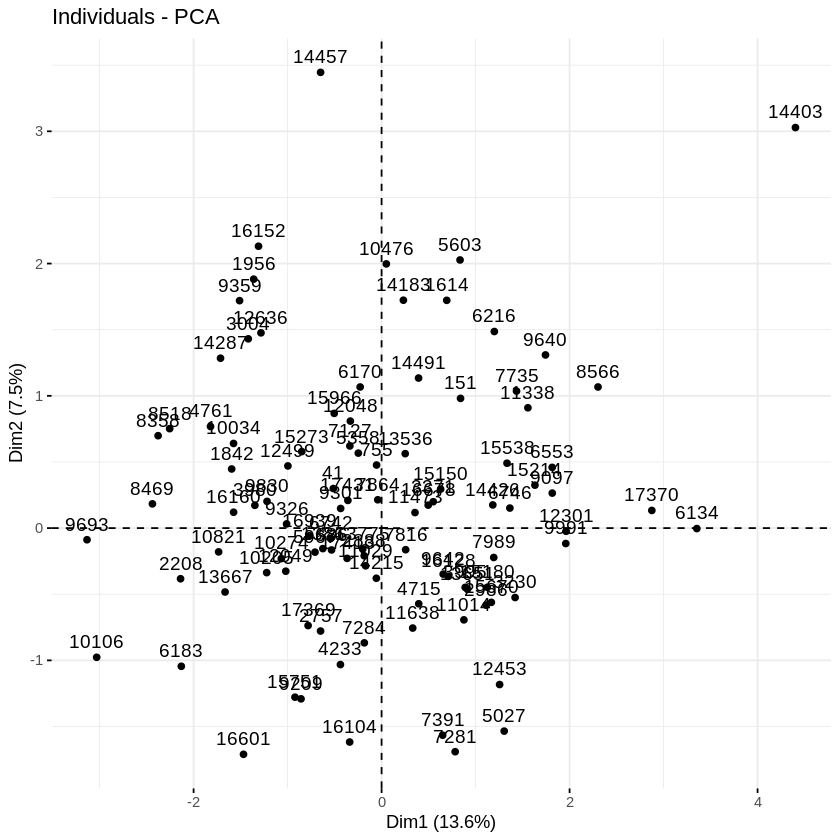

In [32]:
############################################################################################################################################################
############ Since it is not readable , to make it readable , lets take a random sample  of 100 observations and get the same plot for that 100 observations .

pca <- PCA(df[numerical_features], scale.unit = TRUE, graph = FALSE)  # Perform PCA on the entire dataset


ind_coords <- pca$ind$coord  #  Extract the coordinates of the individuals

# Randomly sample 100 observations from the PCA results
set.seed(123)  # Setting seed for reproducibility
sampled_indices <- sample(1:nrow(ind_coords), 100)
sampled_coords <- ind_coords[sampled_indices, ]

# Extract other necessary components for the sampled individuals
sampled_cos2 <- pca$ind$cos2[sampled_indices, ]
sampled_contrib <- pca$ind$contrib[sampled_indices, ]

# Create a new PCA object with the sampled data for visualization purposes
pca_sampled <- list(
  eig = pca$eig,
  var = pca$var,
  ind = list(
    coord = sampled_coords,
    cos2 = sampled_cos2,
    contrib = sampled_contrib
  )
)

# Add class attributes to the new PCA object
class(pca_sampled) <- c("PCA", "list")

# Visualize the sampled individuals in the PCA space
fviz_pca_ind(pca_sampled)

In [ ]:
######## Here we got 3 major  concerns .
##   (01)  We are only considering numerical variables for PCA (so here we ignore the impact of categorical variables )
##   (02) Both our first 2 PCs combined only explaine almost 22% of the total variations .
##   (03)  To get that plot we are using a random sample of 100 observations (we assume that , our sample is a good representation of the entire population )


####  So under those conditions , from above plot we can conclude there are no clear groupings but there are some outliers .

In [34]:
# We can also color the observations based off a grouping variable .
df$fraud <- as.factor(df$fraud)
df$gender <- as.factor(df$gender)
df$marital_status <- as.factor(df$marital_status)
df$high_education_ind <- as.factor(df$high_education_ind)
df$vehicle_category <- as.factor(df$vehicle_category)
df$vehicle_color<- as.factor(df$vehicle_color)

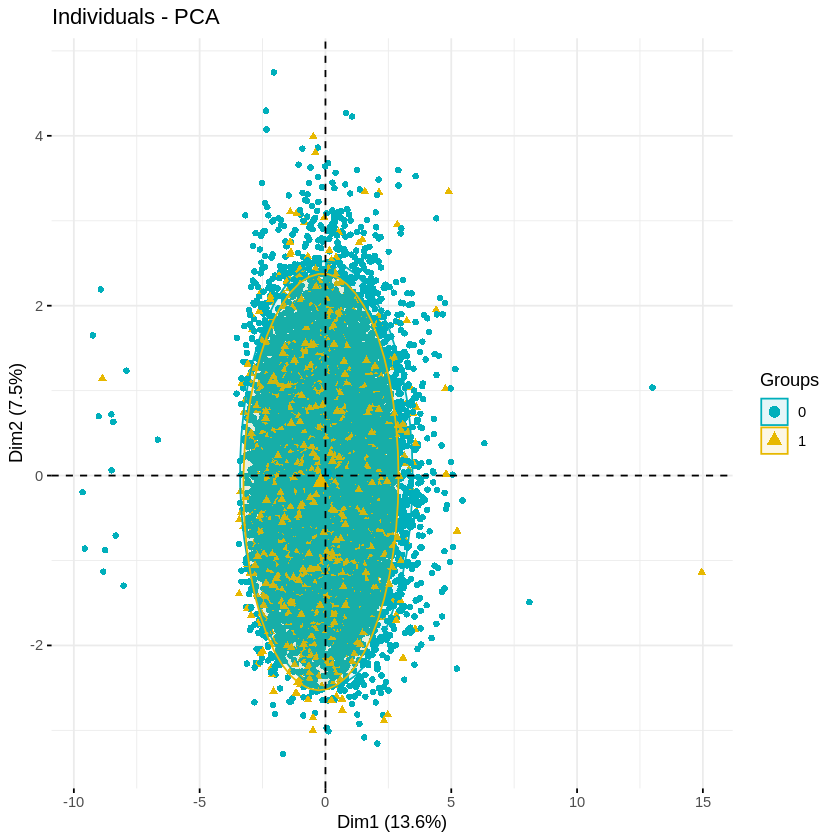

In [36]:

fviz_pca_ind(pca,
geom.ind = "point", # show points only (nbut not "text")
col.ind = df$fraud, # color by groups
palette = c("#00AFBB", "#E7B800", "#FC4E07"),
addEllipses = TRUE, # Concentration ellipses
legend.title = "Groups"
)


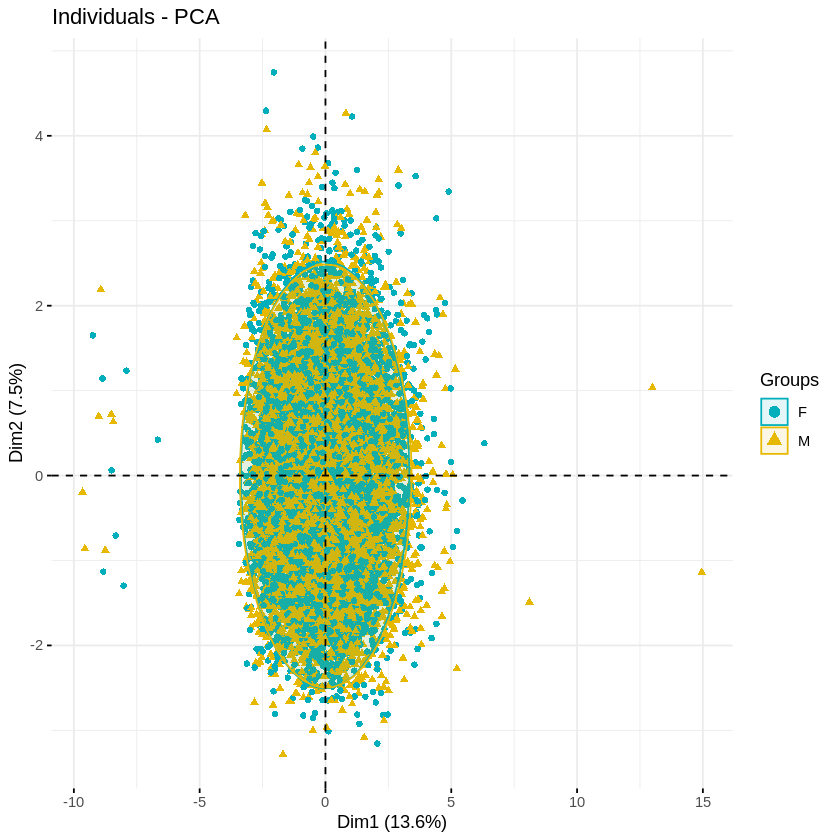

In [37]:
fviz_pca_ind(pca,
geom.ind = "point", # show points only (nbut not "text")
col.ind = df$gender, # color by groups
palette = c("#00AFBB", "#E7B800", "#FC4E07"),
addEllipses = TRUE, # Concentration ellipses
legend.title = "Groups"
)

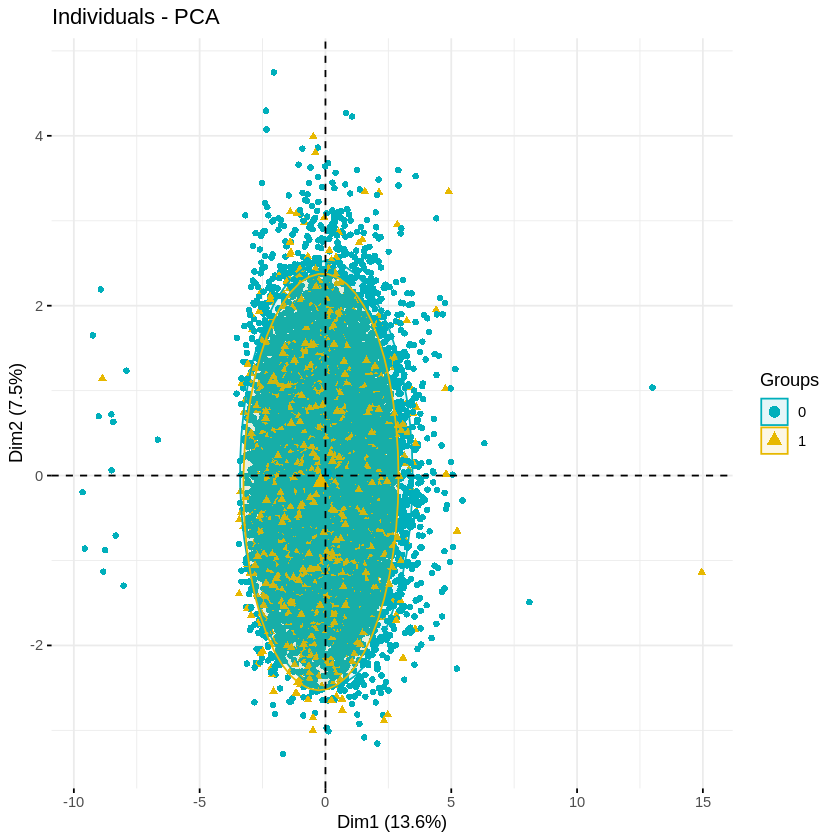

In [38]:
fviz_pca_ind(pca,
geom.ind = "point", # show points only (nbut not "text")
col.ind = df$marital_status, # color by groups
palette = c("#00AFBB", "#E7B800", "#FC4E07"),
addEllipses = TRUE, # Concentration ellipses
legend.title = "Groups"
)

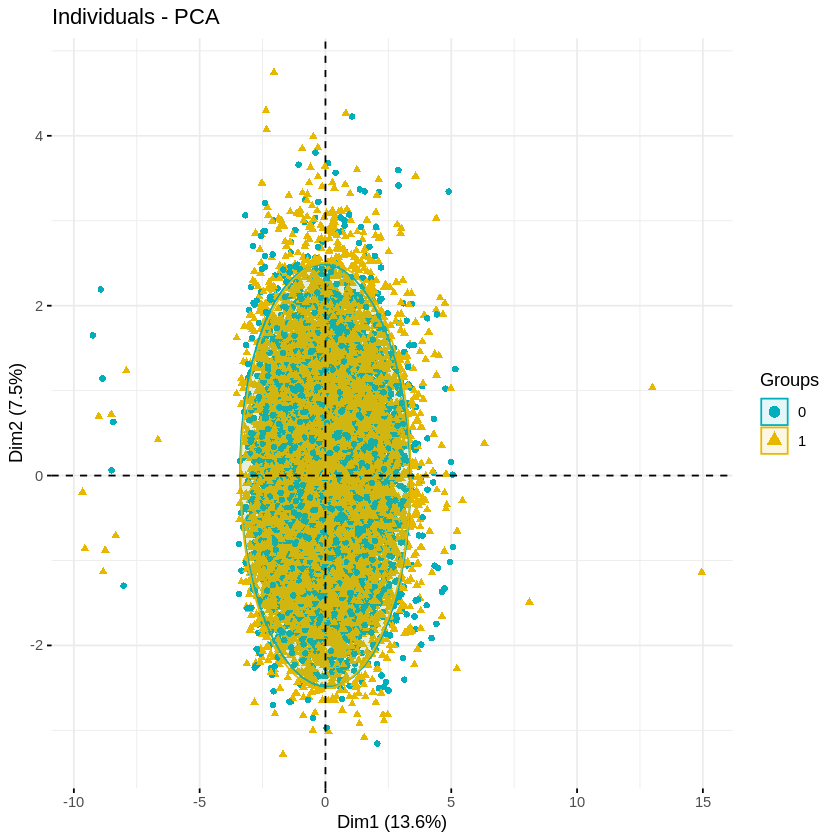

In [39]:
fviz_pca_ind(pca,
geom.ind = "point", # show points only (nbut not "text")
col.ind = df$high_education_ind, # color by groups
palette = c("#00AFBB", "#E7B800", "#FC4E07"),
addEllipses = TRUE, # Concentration ellipses
legend.title = "Groups"
)

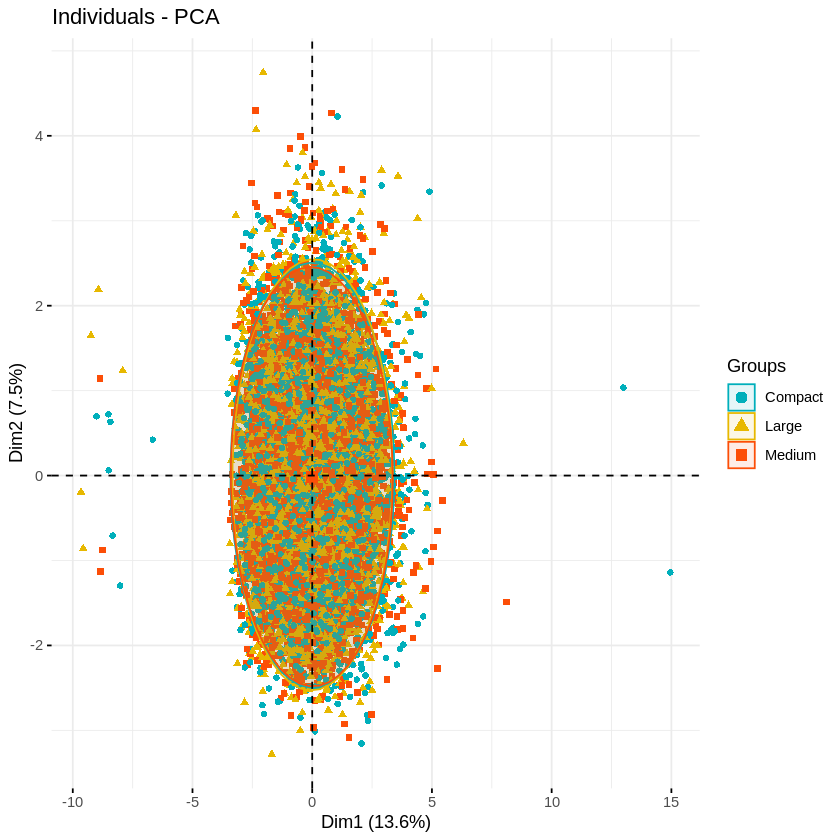

In [40]:
fviz_pca_ind(pca,
geom.ind = "point", # show points only (nbut not "text")
col.ind = df$vehicle_category, # color by groups
palette = c("#00AFBB", "#E7B800", "#FC4E07"),
addEllipses = TRUE, # Concentration ellipses
legend.title = "Groups"
)

In [ ]:
## Now lets performs PCA on a  sample of  100 observations, and visualizes them in a 2D PCA plot, with points colored based on the binary
# response variable fraud. This helps to see if the fraud groups are separable in the PCA space, providing insights into the underlying structure of the data.

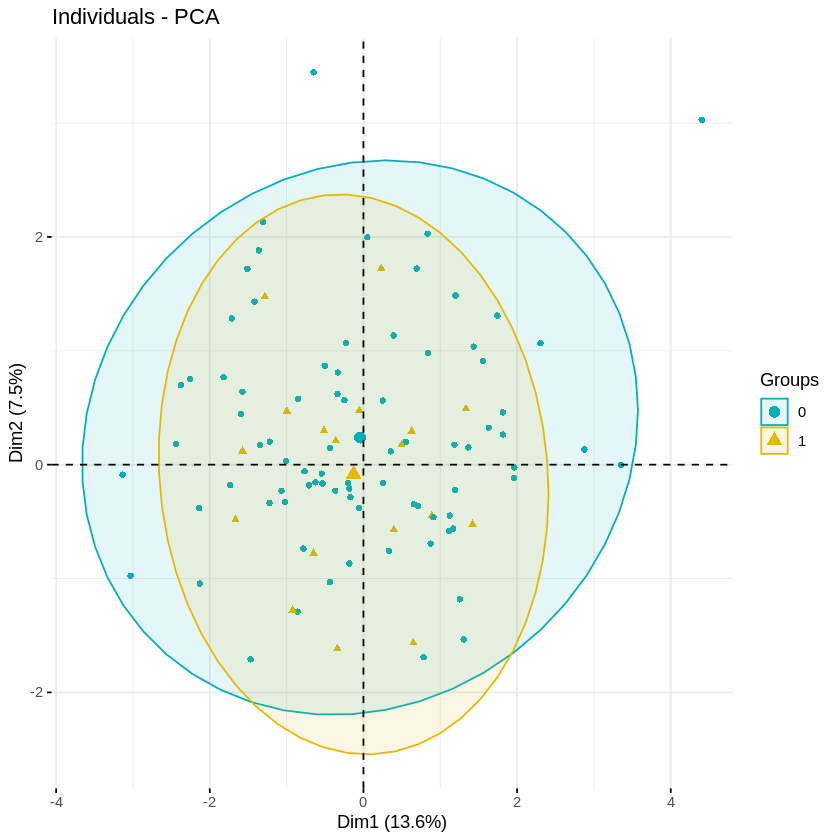

In [62]:
# Perform PCA on the entire dataset
pca <- PCA(df[numerical_features], scale.unit = TRUE, graph = FALSE)

# Extract the coordinates of the individuals
ind_coords <- pca$ind$coord

# Randomly sample 100 observations from the PCA results
set.seed(123)  # Setting seed for reproducibility
sampled_indices <- sample(1:nrow(ind_coords), 100)
sampled_coords <- ind_coords[sampled_indices, ]

# Extract other necessary components for the sampled individuals
sampled_cos2 <- pca$ind$cos2[sampled_indices, ]
sampled_contrib <- pca$ind$contrib[sampled_indices, ]

# Create a new PCA object with the sampled data for visualization purposes
pca_sampled <- list(
  eig = pca$eig,
  var = pca$var,
  ind = list(
    coord = sampled_coords,
    cos2 = sampled_cos2,
    contrib = sampled_contrib
  )
)

# Add class attributes to the new PCA object
class(pca_sampled) <- c("PCA", "list")

# Convert df$fraud to a factor
df$fraud <- as.factor(df$fraud)

# Get the sampled fraud values
sampled_fraud <- df$fraud[sampled_indices]

# Visualize the sampled individuals in the PCA space with color by groups
fviz_pca_ind(pca_sampled,
             geom.ind = "point", # Show points only (but not "text")
             col.ind = sampled_fraud, # Color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups")

# Multiple Correspondence Analysis For Categorical Features

In [77]:
categorical_features

[1] "gender"                  "marital_status"         
 [3] "high_education_ind"      "address_change_ind"     
 [5] "living_status"           "zip_code"               
 [7] "claim_day_of_week"       "accident_site"          
 [9] "witness_present_ind"     "channel"                
[11] "policy_report_filed_ind" "vehicle_category"       
[13] "vehicle_color"

In [78]:
#################  Multiple  Correspondance Analysis  ####################   (123 ->)
df.active <- df[1:55, categorical_features]
df.active <- na.omit(df.active)
df.active[] <- lapply(df.active, factor)

In [79]:
df.active[categorical_features] <- lapply(df.active[categorical_features], factor)

In [80]:
summary(df.active)

 gender marital_status high_education_ind address_change_ind living_status
 F:22   0:21           0:20               0:21               Own :25      
 M:33   1:34           1:35               1:34               Rent:30      
                                                                          
                                                                          
                                                                          
                                                                          
                                                                          
    zip_code  claim_day_of_week     accident_site witness_present_ind
 50047  : 4   Friday   :11      Highway    :12    0:42               
 15024  : 3   Monday   : 2      Local      :23    1:13               
 15001  : 2   Saturday :11      Parking Lot:20                       
 15021  : 2   Sunday   : 6                                           
 80003  : 2   Thursday :10                        

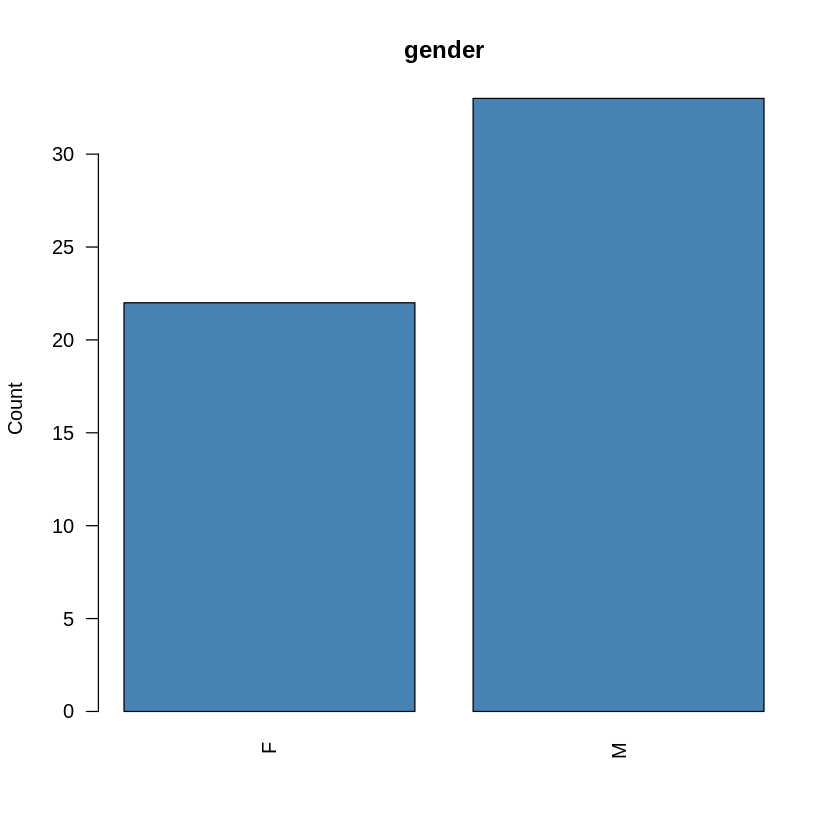

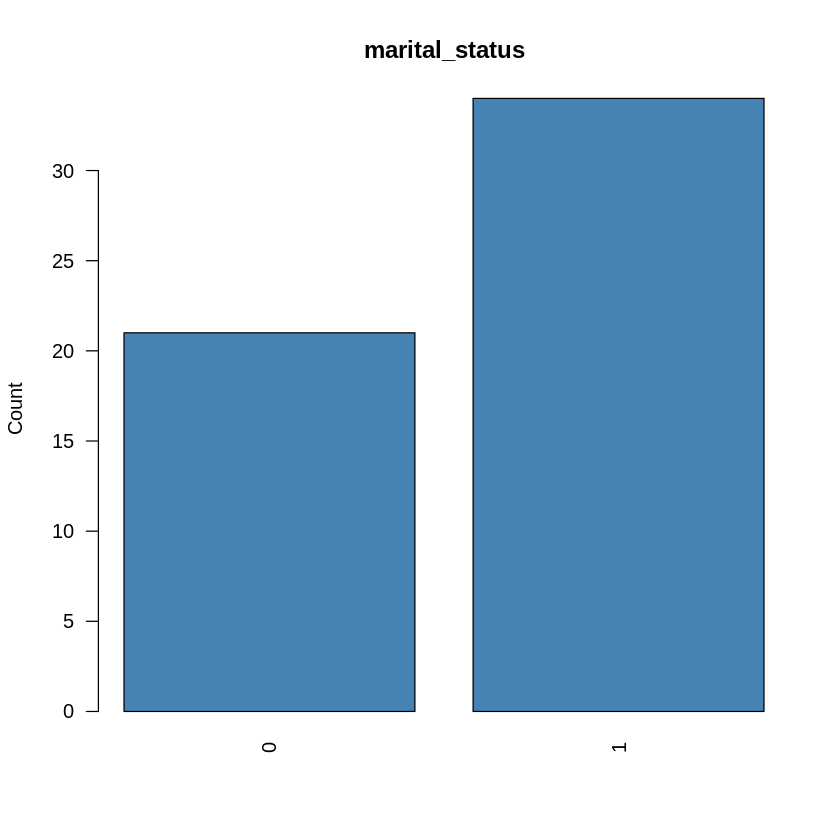

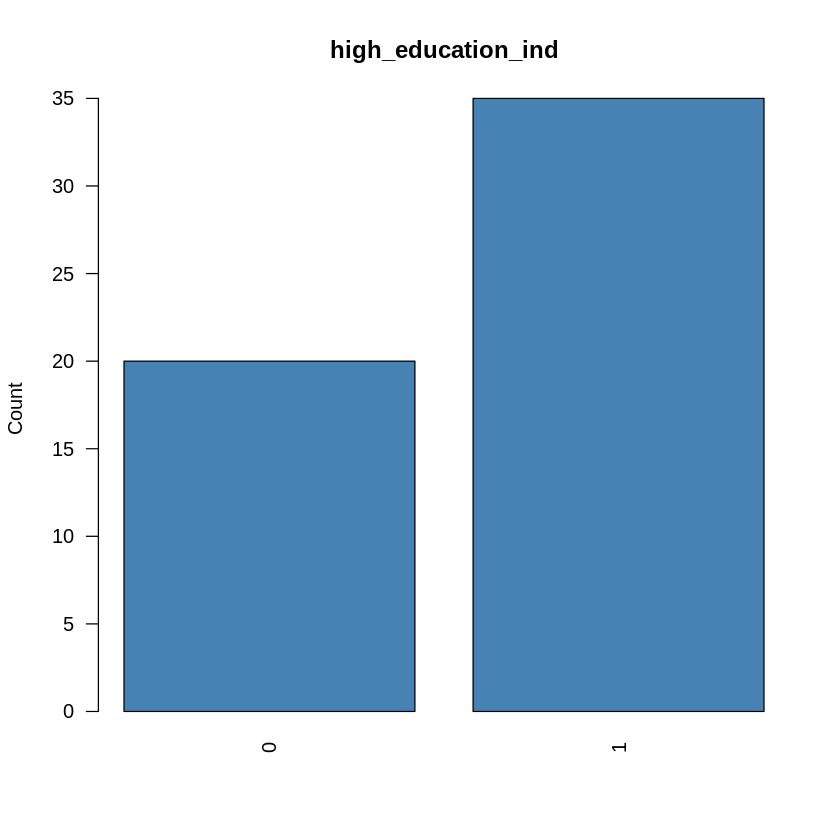

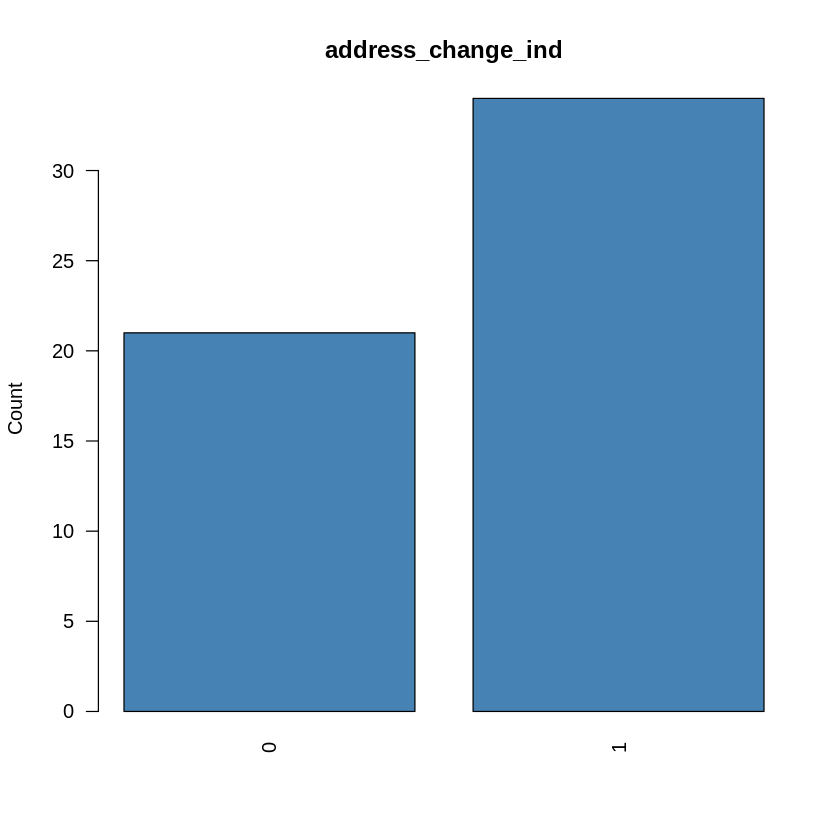

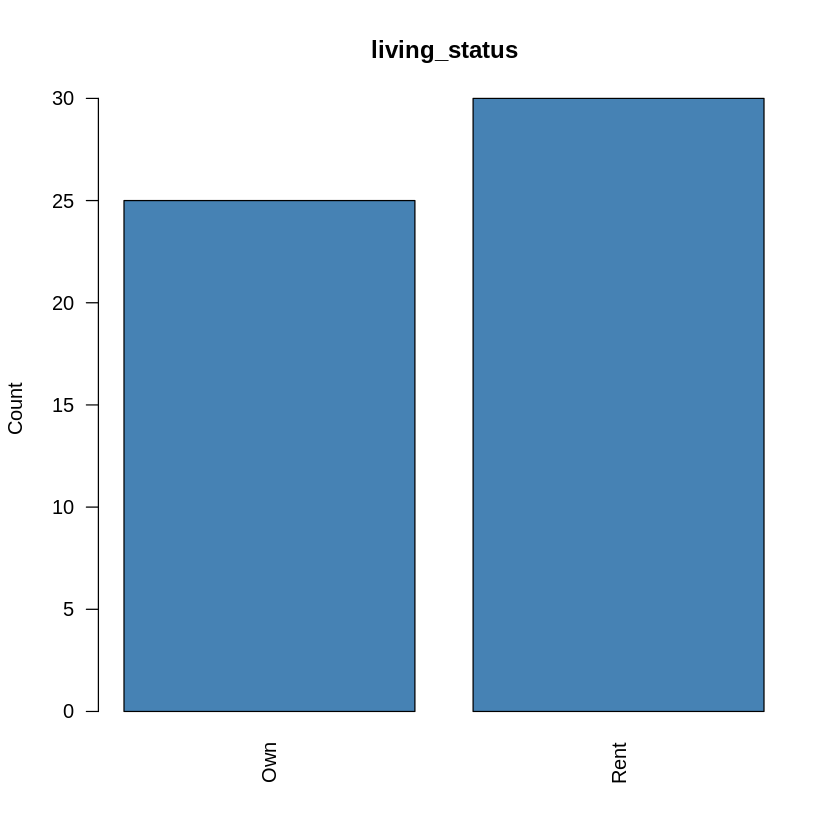

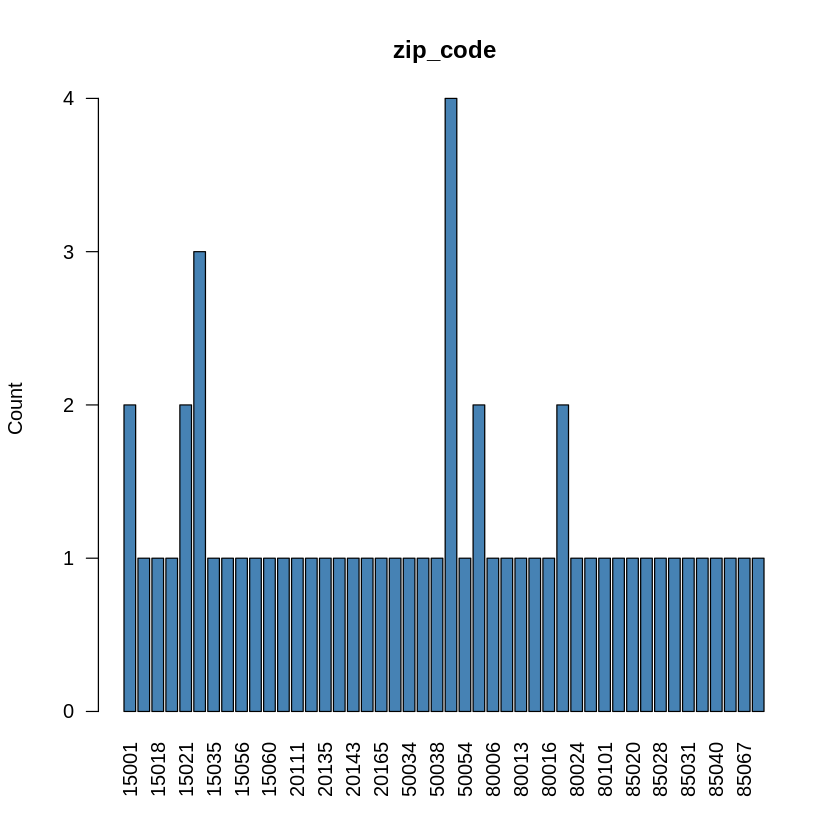

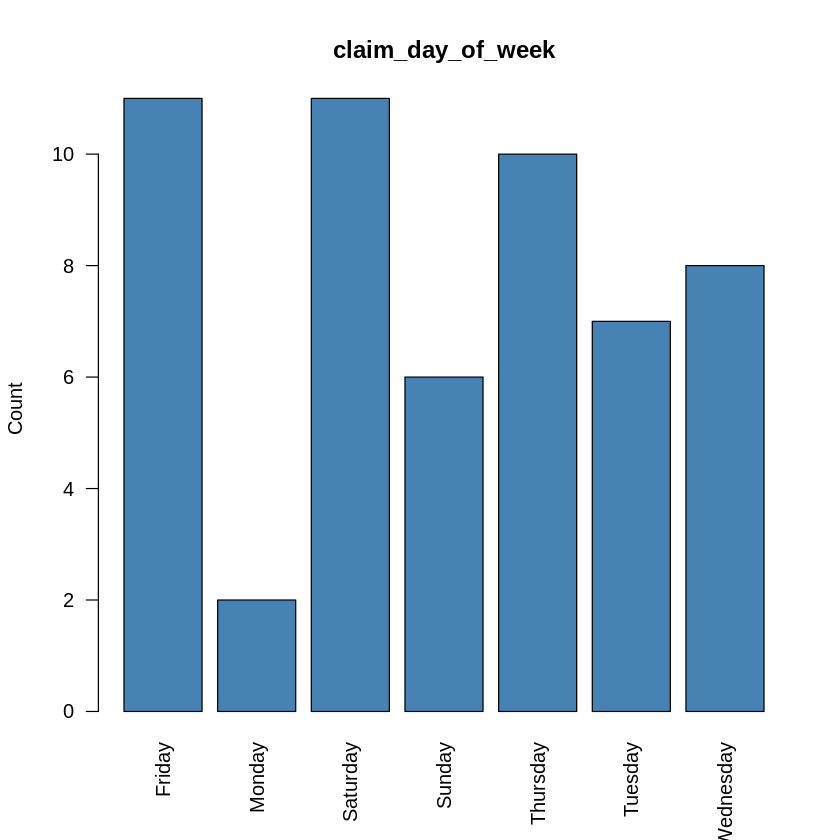

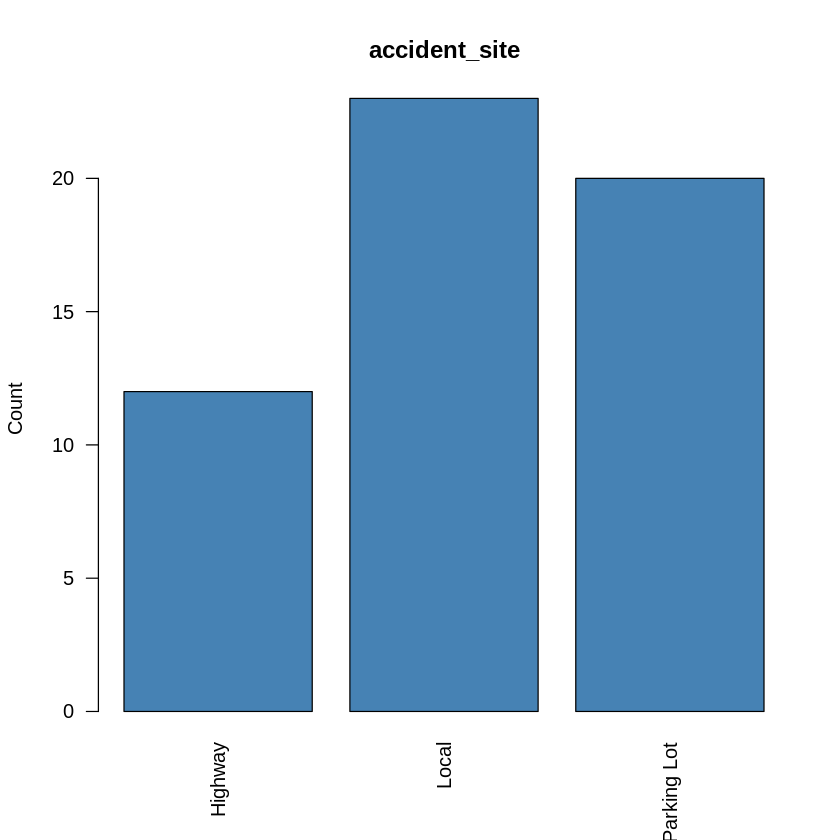

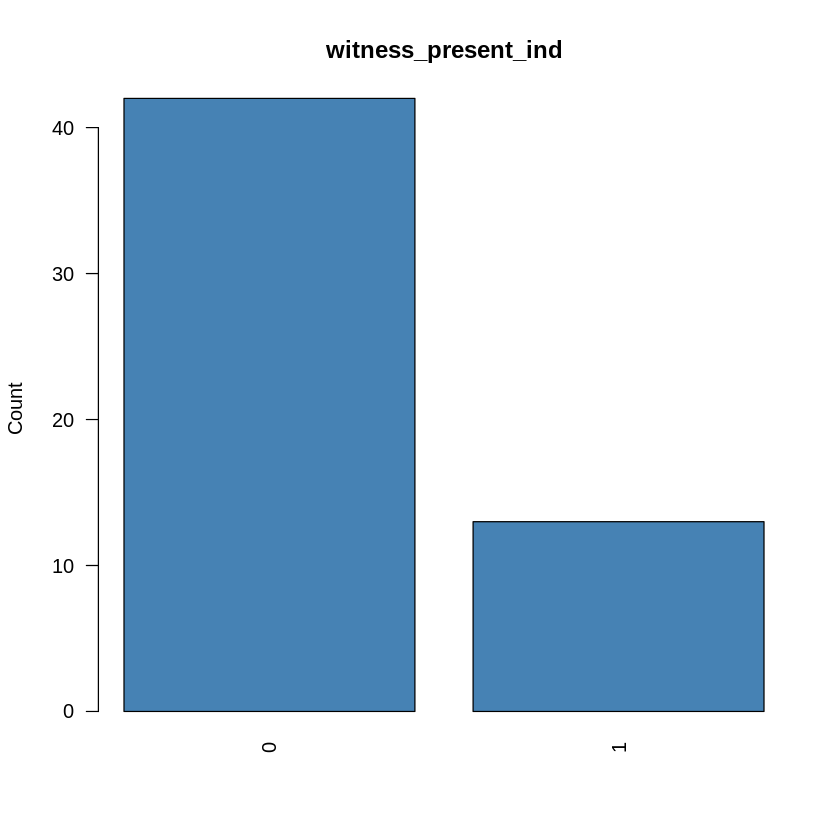

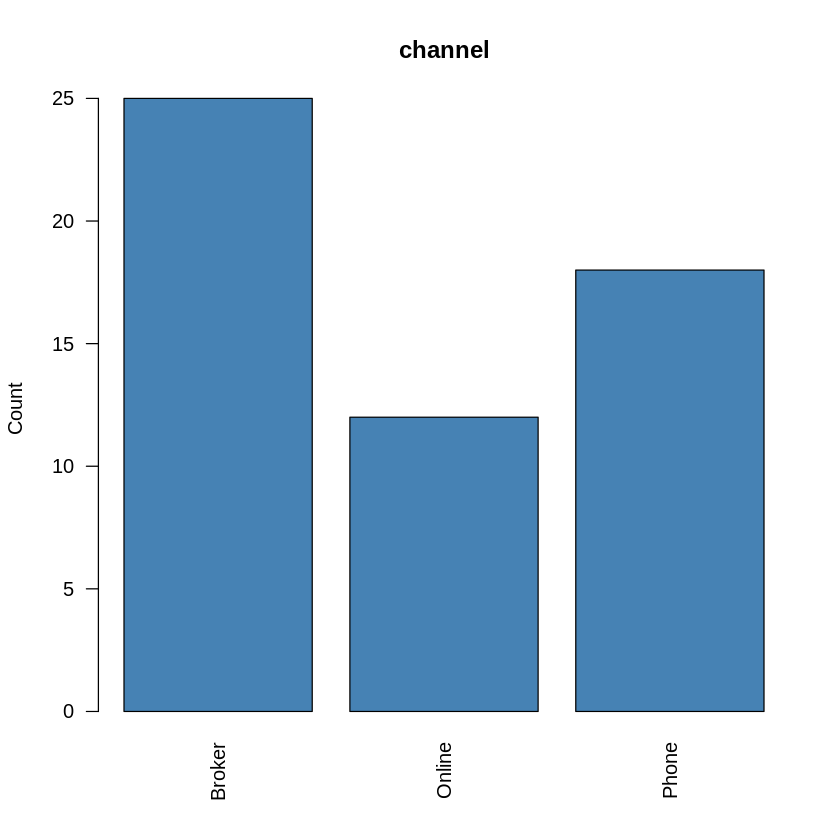

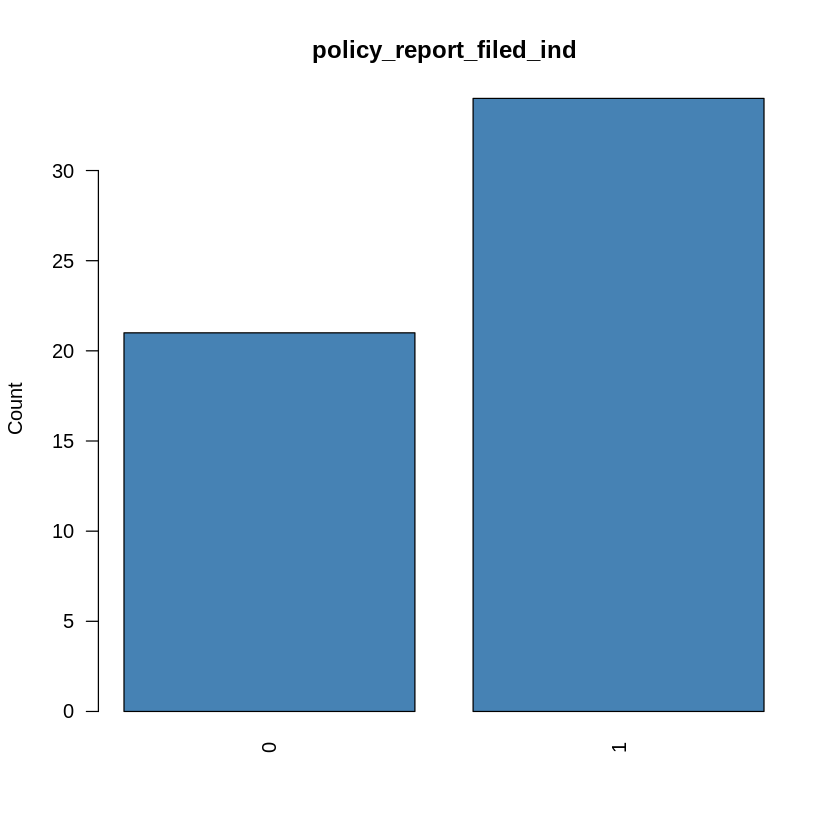

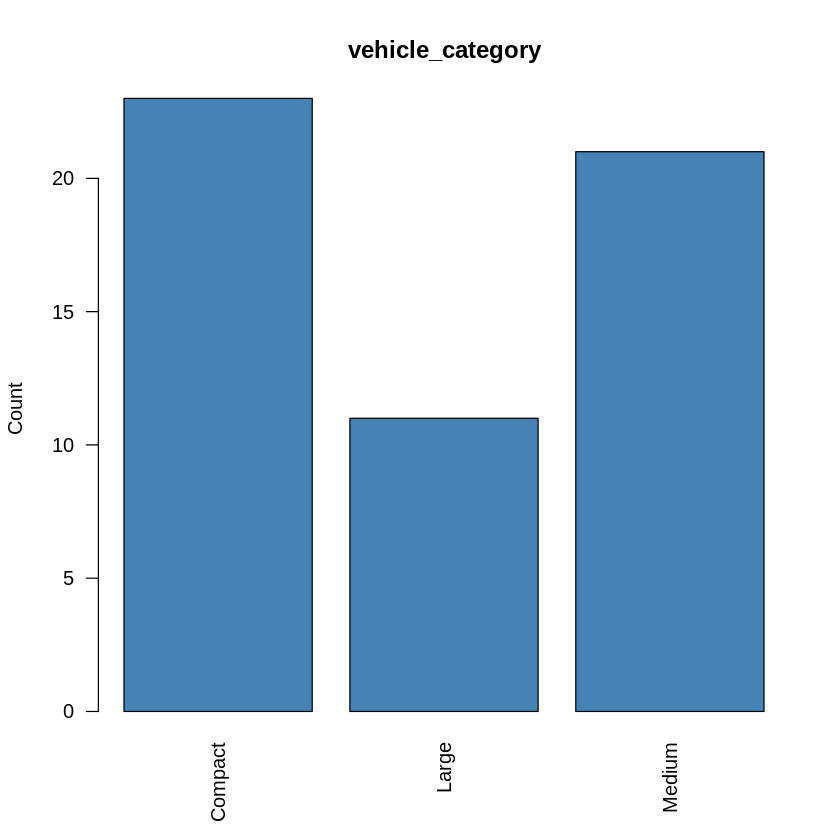

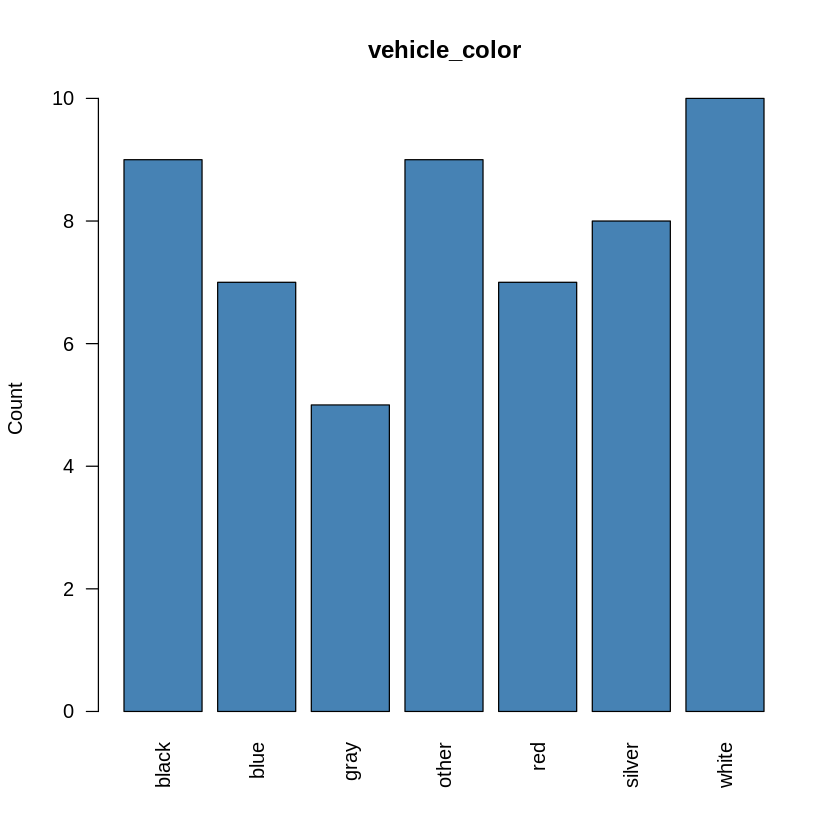

In [81]:
for (i in 1:13) {
plot(df.active[,i], main=colnames(df.active)[i],
ylab = "Count", col="steelblue", las = 2)
}

In [82]:
str(df.active)

'data.frame':	55 obs. of  13 variables:
 $ gender                 : Factor w/ 2 levels "F","M": 2 1 1 1 2 1 2 2 1 2 ...
 $ marital_status         : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 2 2 1 2 ...
 $ high_education_ind     : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 2 2 1 1 ...
 $ address_change_ind     : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 2 2 2 ...
 $ living_status          : Factor w/ 2 levels "Own","Rent": 2 2 1 1 2 1 2 1 1 2 ...
 $ zip_code               : Factor w/ 46 levels "15001","15009",..: 27 5 18 6 21 24 1 31 6 42 ...
 $ claim_day_of_week      : Factor w/ 7 levels "Friday","Monday",..: 1 5 6 5 6 7 3 5 6 5 ...
 $ accident_site          : Factor w/ 3 levels "Highway","Local",..: 2 1 2 2 1 1 3 2 3 3 ...
 $ witness_present_ind    : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 1 ...
 $ channel                : Factor w/ 3 levels "Broker","Online",..: 1 2 1 1 1 3 2 2 1 1 ...
 $ policy_report_filed_ind: Factor w/ 2 levels "0","1": 1 1 1 2 1 1 2 2 1 1 ...
 $ vehicle_categor

In [83]:
mca <- MCA(df.active, graph = FALSE)

In [84]:
print(mca)


**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 55 individuals, described by 13 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$var$eta2"       "coord. of variables"             
8  "$ind"            "results for the individuals"     
9  "$ind$coord"      "coord. for the individuals"      
10 "$ind$cos2"       "cos2 for the individuals"        
11 "$ind$contrib"    "contributions of the individuals"
12 "$call"           "intermediate results"            
13 "$call$marge.col" "weights of columns"              
14 "$call$marge.li"  "weights of

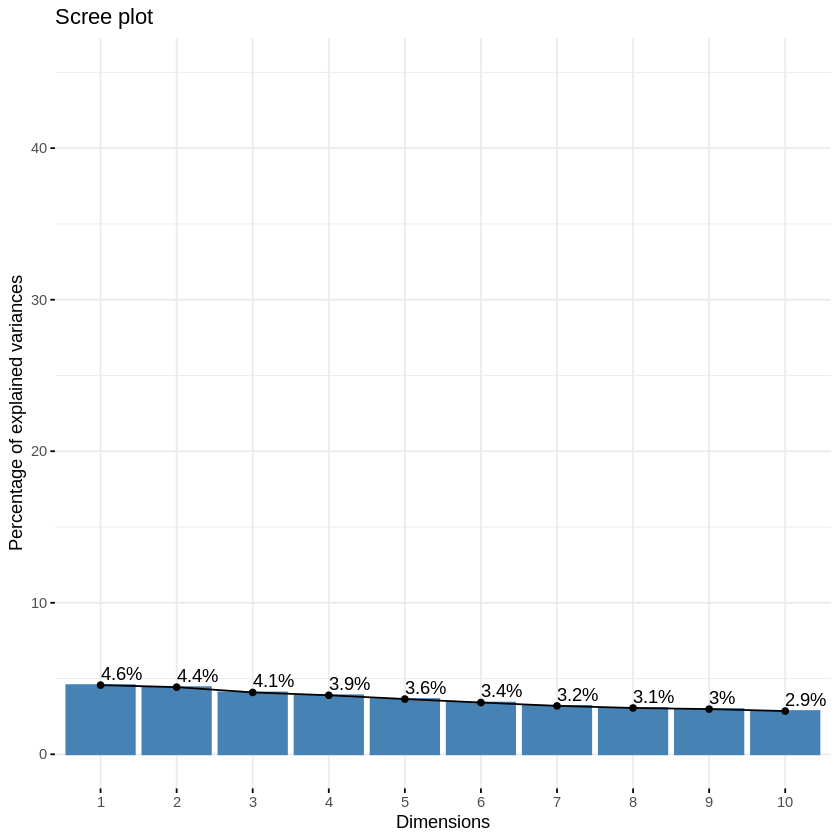

In [85]:
eig.val <- get_eigenvalue(mca)
fviz_screeplot(mca, addlabels = TRUE, ylim = c(0, 45))

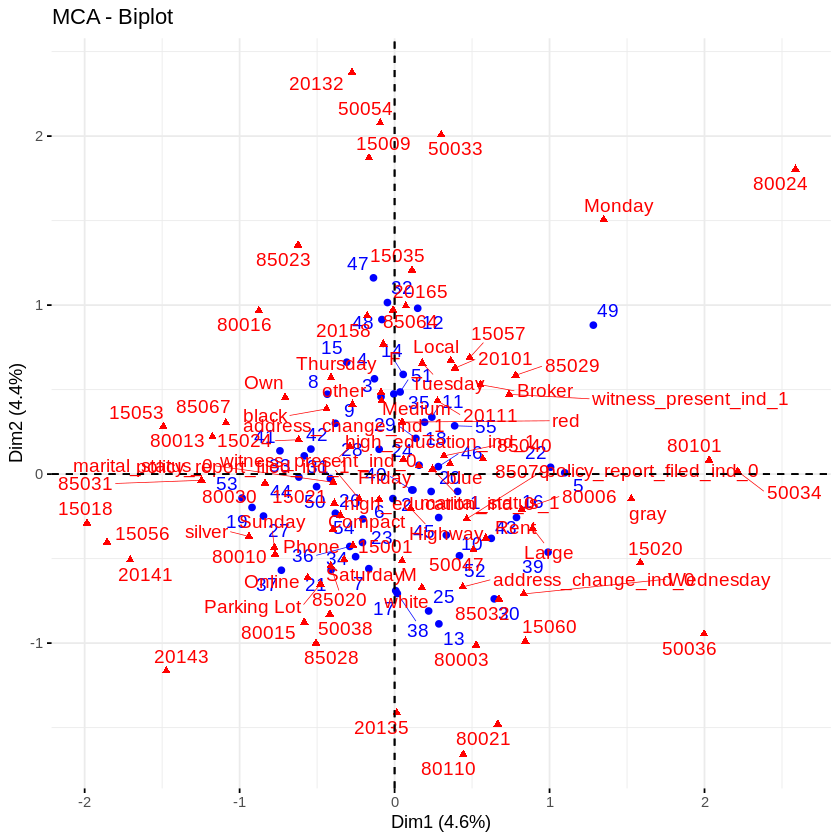

In [87]:
### Biplot
fviz_mca_biplot(mca,
repel = TRUE, # Avoid text overlapping (slow if many point)
ggtheme = theme_minimal())


In [42]:
######################################    Interpretation    ##################################################


# Dim1 (4.6%): The first dimension explains 4.6% of the variance in the data.
# Dim2 (4.4%): The second dimension explains 4.4% of the variance in the data.

# Categories (Red Triangles): Each red triangle represents a category from the categorical variables in the dataset. Categories that are closer to each other are more similar
# in terms of their distribution across the dataset. Individuals (Blue Points): Each blue point represents an individual observation in the dataset.
# Individuals that are closer to a category are more strongly associated with that category. Categories such as Monday, Broker, and witness_present_ind_1 are
#  positioned further along Dim1 and Dim2, indicating they have distinct distributions and contribute significantly to the variance captured by these dimensions.
# Categories like marital_status_0, Own, and black cluster near the origin, indicating they are less distinct and have a more uniform distribution across the dataset.

## Key Observations:
# Observations like 20132, 50054, and 15009 are positioned far from the origin along Dim2, indicating these individuals have unique characteristics strongly associated with
# specific categories. Categories like policy_report_filed_ind_0 and address_change_ind_0 are positioned along Dim1, showing their significant contribution to this dimension

In [90]:
var <- get_mca_var(mca)
var


Multiple Correspondence Analysis Results for variables
  Name       Description                  
1 "$coord"   "Coordinates for categories" 
2 "$cos2"    "Cos2 for categories"        
3 "$contrib" "contributions of categories"

In [93]:
# Correlation between variables and principal dimensions

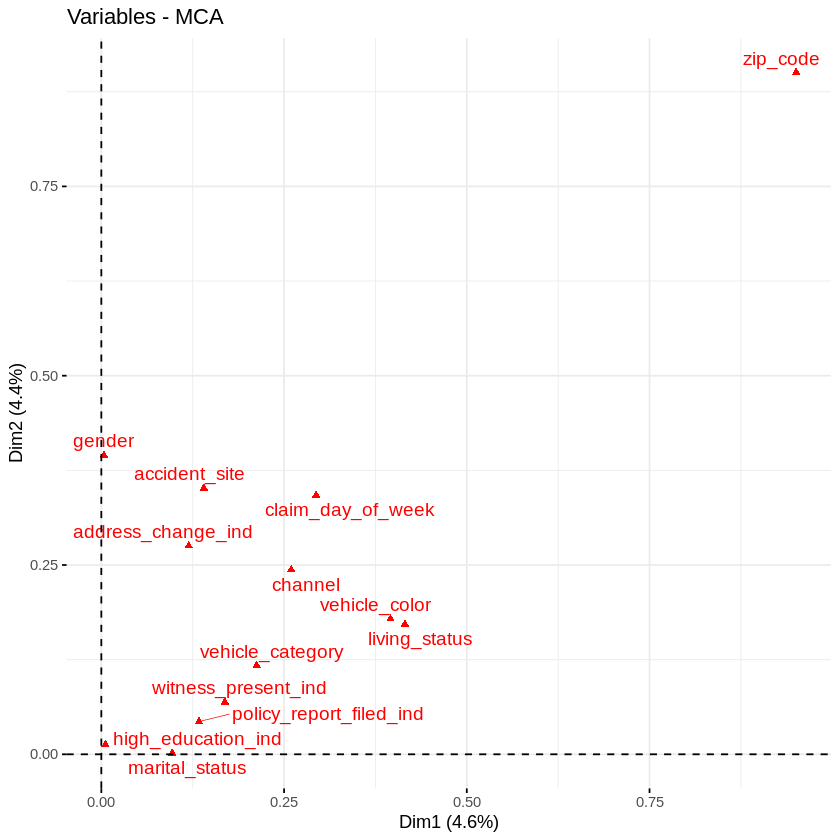

In [94]:
fviz_mca_var(mca, choice = "mca.cor",
repel = TRUE, # Avoid text overlapping (slow)
ggtheme = theme_minimal())

In [101]:
|####################################     Interpretation    #################################################
# Dim1 (4.6%): The first dimension explains 4.6% of the variance in the data.
# Dim2 (4.4%): The second dimension explains 4.4% of the variance in the data.


# zip_code: Positioned farthest along Dim1, indicating it has a significant contribution to this dimension. gender, accident_site, address_change_ind: These variables contribute
#  significantly to Dim2, as indicated by their positioning away from the origin along this axis. Claim_day_of_week, channel, vehicle_color, living_status: These variables also
#  have notable contributions to Dim1 and Dim2, suggesting they play an important role in the variance explained by these dimensions.marital_status,
# high_education_ind, policy_report_filed_ind, witness_present_ind: These variables cluster near the origin, indicating they have less influence on the variance
# captured by the first two dimensions.

# Clusters and Patterns:
# Variables closer to each other in the plot are more likely to be related or to explain similar parts of the variance in the data.
# The distinct positioning of zip_code suggests that it captures unique information not as closely related to the other variables.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '|'
1: |
    ^


In [ ]:
##########################    Quality of representation of variable categories ##########################

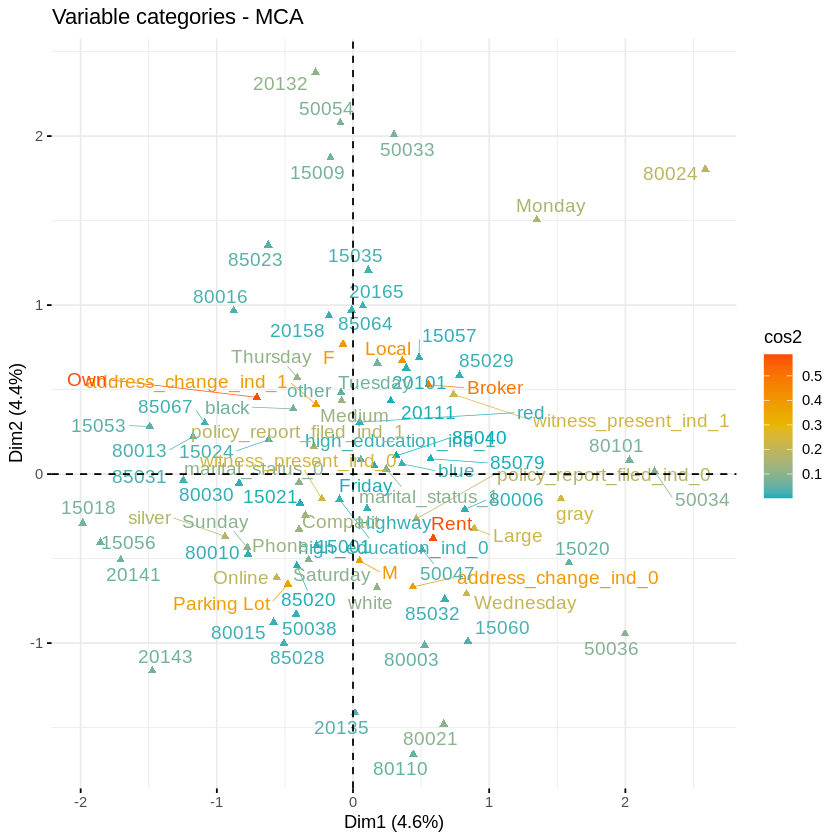

In [113]:
# Color by cos2 values: quality on the factor map
fviz_mca_var(mca, col.var = "cos2",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE, # Avoid text overlapping
ggtheme = theme_minimal())

In [105]:
# Dim1 (4.6%): The first dimension explains 4.6% of the variance in the data.
# Dim2 (4.4%): The second dimension explains 4.4% of the variance in the data.

### Quality of Representation (cos2 Values):
# Categories with higher cos2 values (in red) are better represented in the factor map. For example, Monday, address_change_ind_1, and Own are well represented.
# Categories with lower cos2 values (in blue) are less well represented.

## Key Variables:
# Monday: Positioned far along Dim2 with a high cos2 value, indicating it is well represented and significant for this dimension.
# address_change_ind_1 and Own: These categories are positioned away from the origin with higher cos2 values, indicating they contribute significantly to the variance explained by Dim1 and Dim2.

## Clusters and Patterns:
# Categories that are close together in the plot share similar characteristics or responses. For example, Saturday and Sunday are close to each other, suggesting similar distributions.
# Categories with high cos2 values positioned further from the origin are distinct and contribute significantly to the explained variance.







In [108]:
library(corrplot)

corrplot 0.92 loaded



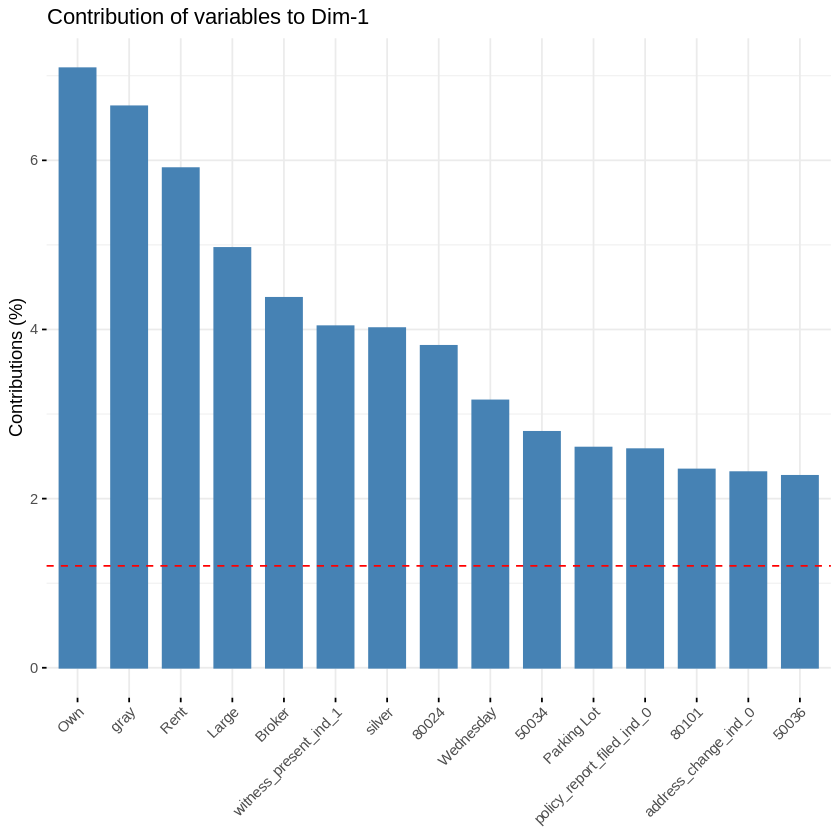

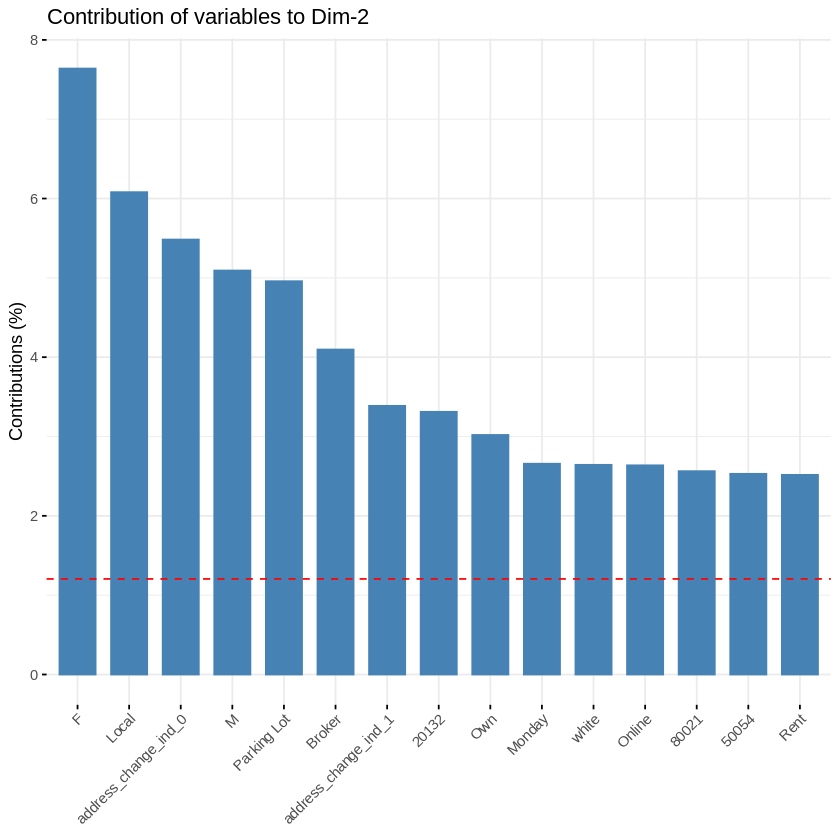

In [111]:
# Contribution of variable categories to the dimensions
# Contributions of rows to dimension 1
fviz_contrib(mca, choice = "var", axes = 1, top = 15)
# Contributions of rows to dimension 2
fviz_contrib(mca, choice = "var", axes = 2, top = 15)

In [ ]:
####################################################################  Interpretation       ##########################################################################################
############   Contribution of Variables to Dim2 ############
##Top Contributors:

# F: This variable has the highest contribution to Dim2, nearly 8%.
# Local and address_change_ind_0: Each contributes around 6%.
# M, Parking Lot, and Broker: Each has a contribution of around 5%.

###Threshold: The red dashed line represents the average contribution threshold for Dim2.

## Interpretation:The variables like F, Local, and address_change_ind_0 are crucial for defining the variance captured by Dim2. These variables are particularly important
# for the second dimension's structure and explain a significant portion of the variance in this dimension.



##############  Contribution of Variables to Dim1  ####################
### Top Contributors:
# Own: This variable has the highest contribution to Dim1, above 6%.
# gray and Rent: Each contributes around 6%.
# Large and Broker: Each has a contribution of around 5%.

## Threshold: The red dashed line indicates the average contribution threshold for Dim1.

## Interpretation: Variables like Own, gray, and Rent are the most influential in explaining the variance captured by Dim1. These variables are particularly important
# for the first dimension's structure and play a key role in defining the underlying patterns in the data.

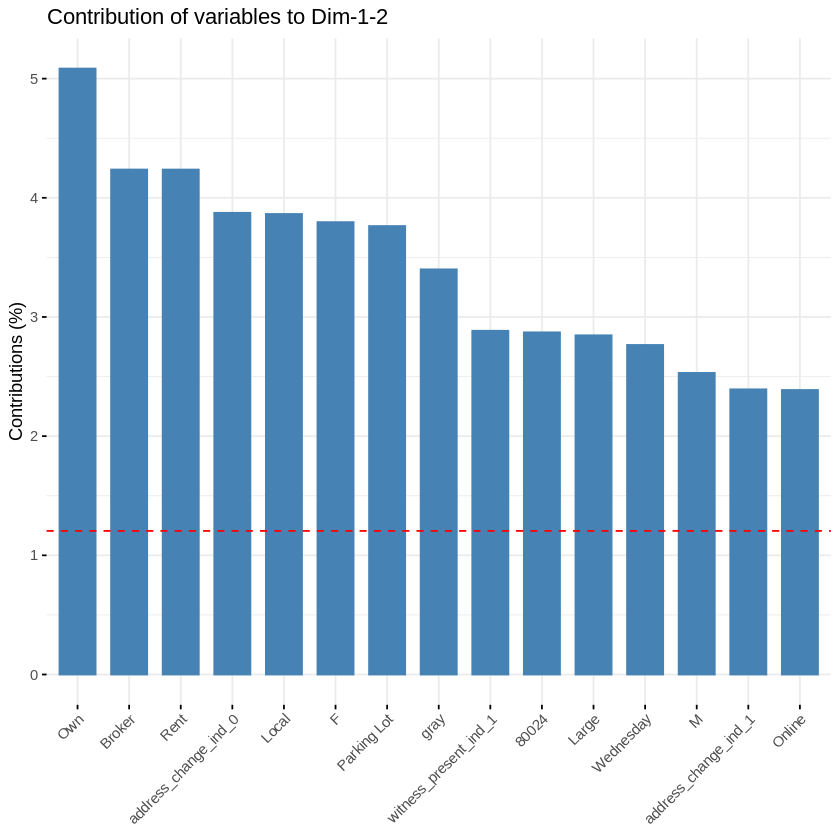

In [114]:
# Total contribution to dimension 1 and 2
fviz_contrib(mca, choice = "var", axes = 1:2, top = 15)

In [ ]:
##########   Top Contributors:   ##################

## Own: This variable has the highest contribution, just over 5%.
## Broker and Rent: Both have contributions around 4.5%.
## address_change_ind_0, Local, and F: Each contributes around 4%.

### Threshold:

# The red dashed line indicates the average contribution threshold. Variables above this line contribute more than the average to the combined dimensions Dim1 and Dim2.

## Interpretation: These variables are significant in explaining the overall variance when both dimensions are considered together. Variables like Own, Broker,
#   and Rent are particularly important for understanding the underlying structure of the data across the first two dimensions.

In [ ]:
 ###################################################################################################################################################
 ##############################################    Graph of individuals    #########################################################################
 ####################################################################################################################################################

In [113]:
ind <- get_mca_ind(res.mca)
ind


Multiple Correspondence Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

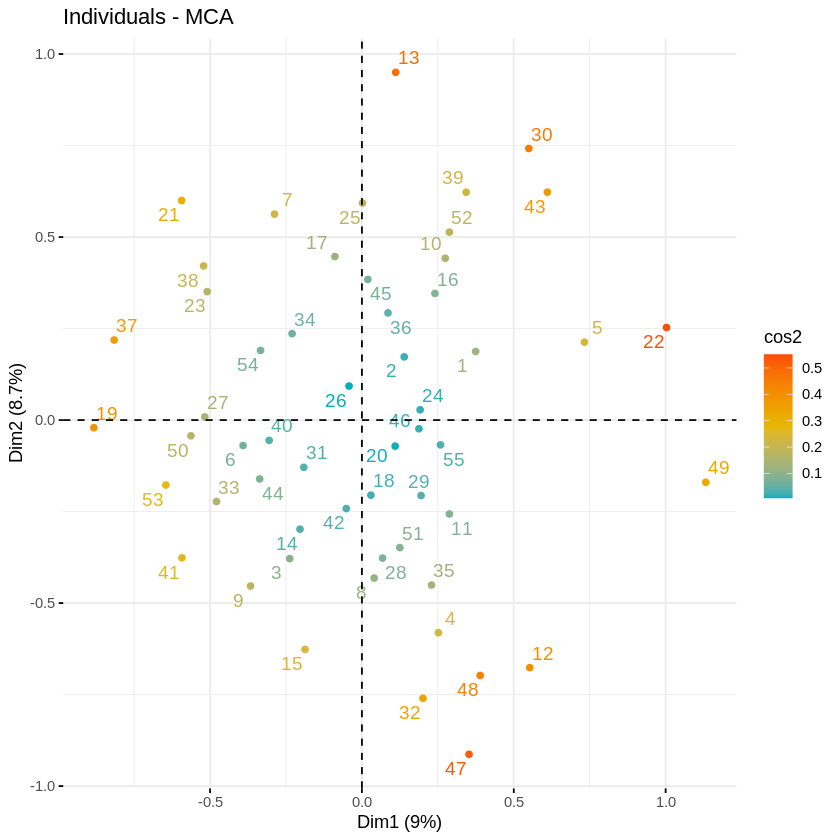

In [112]:
fviz_mca_ind(res.mca, col.ind = "cos2",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE, # Avoid text overlapping (slow if many points)
ggtheme = theme_minimal())


In [ ]:
# This MCA (Multiple Correspondence Analysis) plot for individuals is useful for visualizing the distribution and quality of representation of individuals
# in the reduced-dimensional space defined by the principal components. It helps in identifying how well individuals are represented and how they cluster based on their characteristics.
# The plot displays the positions of individuals (data points) along the first two dimensions (Dim1 and Dim2), colored by their cos2 values. The cos2 values indicate the quality of
#  representation of each individual, with higher values (darker colors) representing better representation.


# Dimensions: Dim1 explains 9% of the variance, and Dim2 explains 8.7% of the variance.
# Cos2 Values: Individuals with higher cos2 values (darker colors) are better represented by the dimensions. For example, individuals like 13, 22, and 47 have higher cos2 values,
#  indicating they are well represented. Clusters: Individuals close to each other share similar characteristics. For instance, individuals grouped near the center (e.g., 1, 2, 20)
# are less distinct, while those further away (e.g., 13, 22, 47) are more distinct in terms of their characteristics.
# This plot effectively visualizes the representation quality of individuals and highlights patterns and clusters within the dataset, aiding in deeper analysis and interpretation.








In [ ]:
# Dimension description

res.desc <- dimdesc(res.mca, axes = c(1,2))
# Description of dimension 1
res.desc[[1]]
# Description of dimension 2
res.desc[[2]]

# Factor Analysis (for mixed type )

In [127]:
categorical_features

[1] "gender"                  "marital_status"         
 [3] "high_education_ind"      "address_change_ind"     
 [5] "living_status"           "zip_code"               
 [7] "claim_day_of_week"       "accident_site"          
 [9] "witness_present_ind"     "channel"                
[11] "policy_report_filed_ind" "vehicle_category"       
[13] "vehicle_color"

In [128]:
df[categorical_features] <- lapply(df[categorical_features], factor)
str(df)


'data.frame':	17998 obs. of  27 variables:
 $ claim_number           : int  1 3 4 5 6 7 8 10 12 15 ...
 $ age_of_driver          : int  46 21 49 58 38 56 27 40 45 31 ...
 $ gender                 : Factor w/ 2 levels "F","M": 2 1 1 1 2 1 2 2 1 2 ...
 $ marital_status         : Factor w/ 3 levels "0","1","2": 2 1 1 2 2 1 2 2 1 2 ...
 $ safty_rating           : int  85 75 87 58 95 72 80 79 86 80 ...
 $ annual_income          : int  38301 30445 38923 40605 36380 40240 32952 36891 38069 34324 ...
 $ high_education_ind     : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 2 2 1 1 ...
 $ address_change_ind     : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 2 2 2 ...
 $ living_status          : Factor w/ 2 levels "Own","Rent": 2 2 1 1 2 1 2 1 1 2 ...
 $ zip_code               : Factor w/ 276 levels "0","15001","15003",..: 156 17 96 19 127 139 2 164 19 233 ...
 $ claim_day_of_week      : Factor w/ 7 levels "Friday","Monday",..: 1 5 6 5 6 7 3 5 6 5 ...
 $ accident_site          : Factor w/ 3 levels "Highw

In [129]:
famd <-FAMD(df,graph=FALSE)

In [130]:
famd

*The results are available in the following objects:

  name          description                             
1 "$eig"        "eigenvalues and inertia"               
2 "$var"        "Results for the variables"             
3 "$ind"        "results for the individuals"           
4 "$quali.var"  "Results for the qualitative variables" 
5 "$quanti.var" "Results for the quantitative variables"

In [131]:
eig.val <- get_eigenvalue(famd)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.262008,0.7180979,0.7180979
Dim.2,1.368420,0.4344191,1.1525170
Dim.3,1.246439,0.3956948,1.5482118
Dim.4,1.242365,0.3944016,1.9426134
Dim.5,1.178114,0.3740043,2.3166177


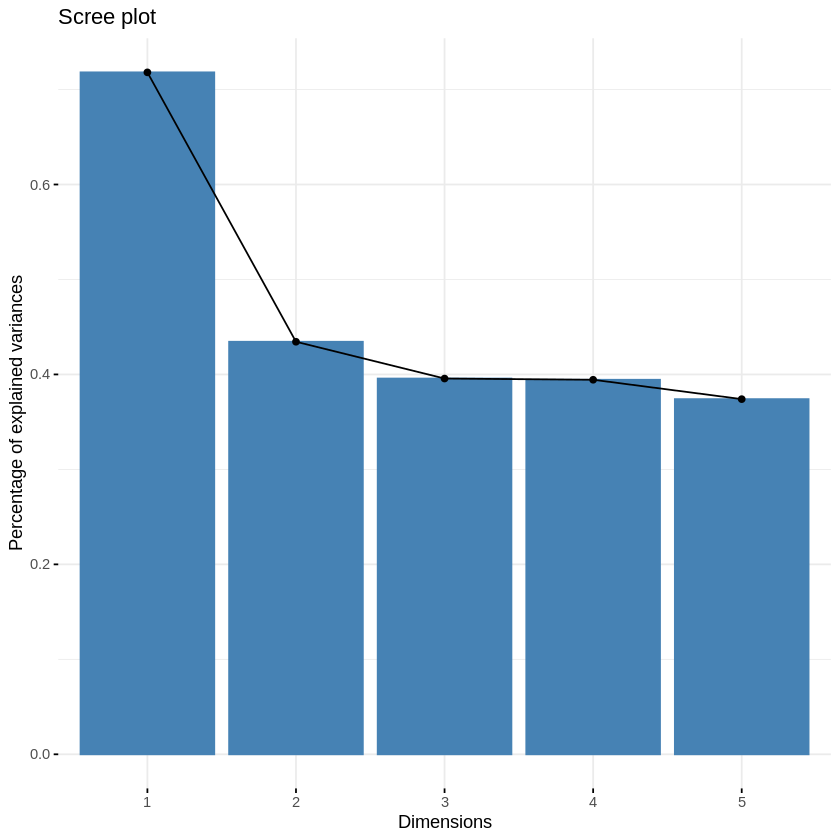

In [132]:
fviz_screeplot(famd)


In [133]:
############ So from the above scree plot , it is  obviuos that when we apply FA for the entire data set couldnt capture a
# considerable amount of variation of our entire data set as all the 5 Dimensions combined it explain only 2% of total variance

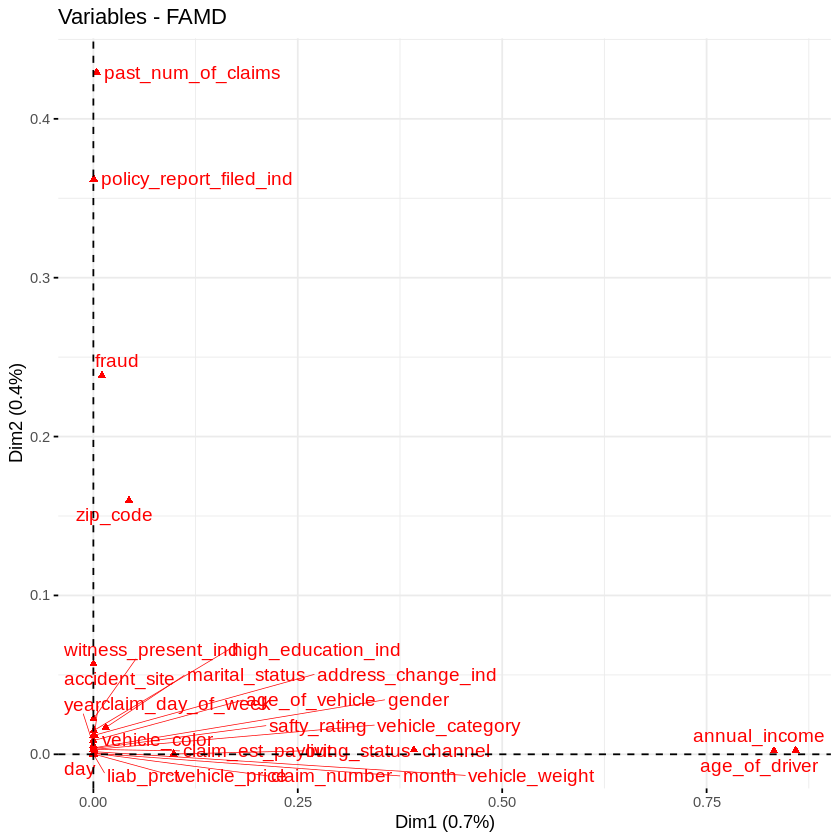

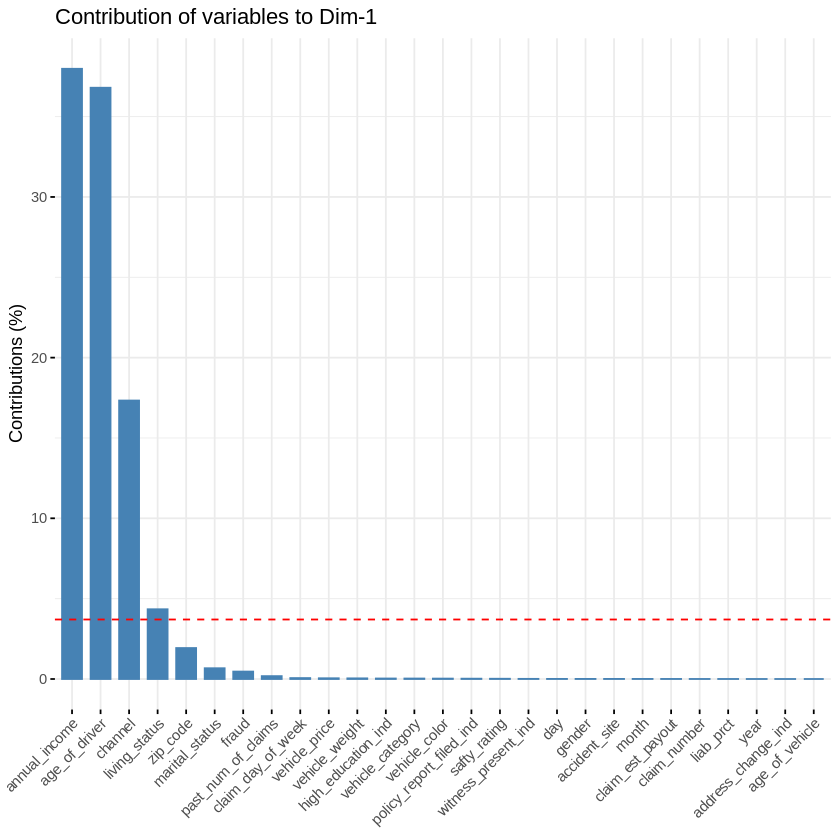

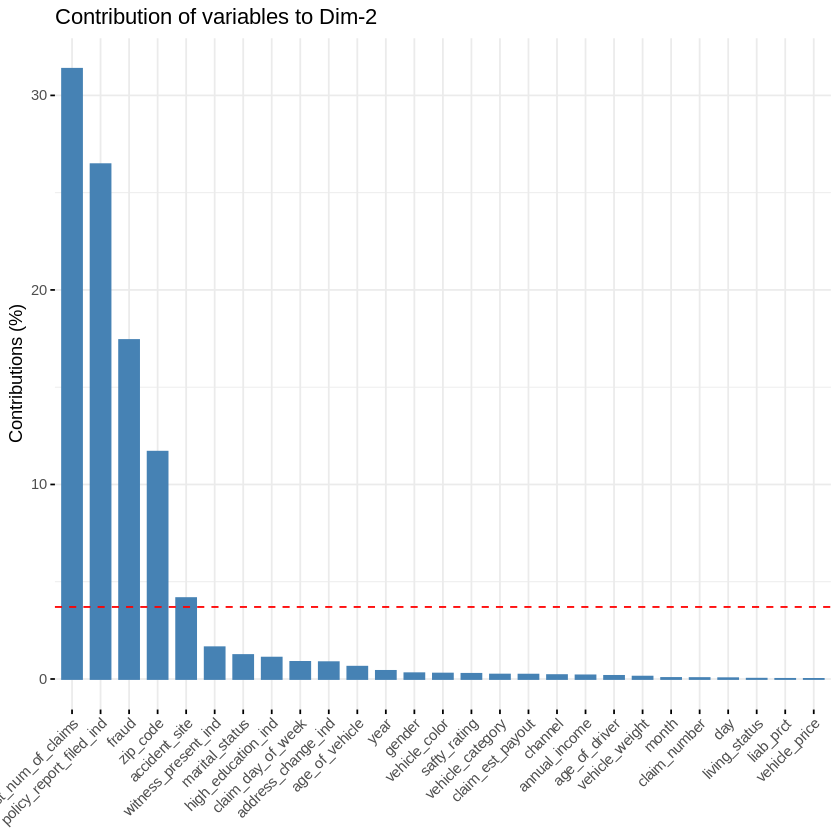

In [182]:
# Plot of variables
fviz_famd_var(famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(famd, "var", axes = 2)

In [140]:
#############################################   Interpretation of above 3 plots  ############################################


###############################    plot 01 :  Variables - FAMD           ############################################
# This scatter plot shows the results of a Factor Analysis of Mixed Data (FAMD), which combines PCA for continuous variables and MCA for categorical variables.

###### Key Variables:
## past_num_of_claims, policy_report_filed_ind, and fraud are located far from the origin, indicating strong contributions to Dim-2.
## annual_income and age_of_driver are positioned far along Dim-1, signifying their significant influence on this dimension.

######Clusters and Correlations:
## Variables close to each other, such as annual_income and age_of_driver, are positively correlated.
##  policy_report_filed_ind, and past_num_of_claims cluster together, suggesting a relationship between these variables in the context of claims and fraud detection.

#### Dimensional Contribution:
# Dim1 (5.5%): Captures aspects related to income and age.
# Dim2 (3.2%): Captures aspects related to claims history and fraud indicators.

#### Insights:
# The FAMD plot provides a comprehensive view of how both continuous and categorical variables contribute to the underlying data structure, emphasizing the
# importance of claims history, fraud indicators, and socio-economic factors.





############  plot 02 :  Contribution of Variables to Dim-1  #########################################
## This bar chart illustrates the contribution of different variables to the first principal component (Dim-1) in a PCA.

##### Key Contributors:
# annual_income and age_of_driver are the top contributors to Dim-1, each contributing around 40%.
# channel and marital_status also contribute but to a much lesser extent, with contributions around 10% and below.
# Variables like past_num_of_claims, and claim_day_of_week have minimal contributions to Dim-1.

##### Threshold Line:
##The red dashed line indicates a threshold for contribution significance. Variables above this line are significant contributors to Dim-1, whereas those below are not.

##### Insights:
## The first principal component is mainly driven by demographic factors such as income and age, suggesting that Dim-1 captures socio-economic aspects of the data.




###########################    plot 03 :  Contribution of Variables to Dim-2    ############################################

### This bar chart shows the contribution of various variables to the second principal component (Dim-2) in a PCA.

#### Key Contributors:
# past_num_of_claims contributes the most to Dim-2, with a contribution percentage exceeding 30%.
# policy_report_filed_ind and fraud are also significant contributors, each contributing over 20%.
# Other variables like accident_site, witness_present_ind, and high_education_ind have much lower contributions, falling below 10%.

#### Threshold Line:
# The red dashed line represents a threshold for variable contribution. Variables above this line are considered significant contributors to Dim-2, while those below are less significant.


####Insights:
# The contributions suggest that the second principal component is primarily influenced by past claims history and indicators related to fraud and policy reporting,
#  highlighting their importance in this dimension.






ERROR: Error in parse(text = x, srcfile = src): <text>:6:6: unexpected symbol
5: 
6: This bar
        ^


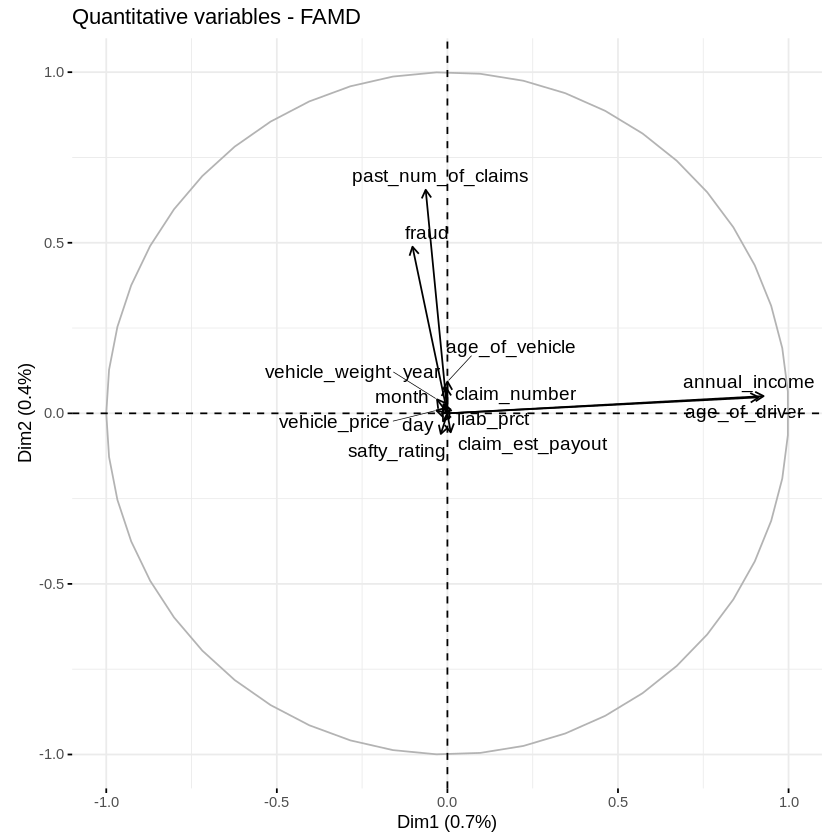

In [141]:
fviz_famd_var(famd, "quanti.var", repel = TRUE,
col.var = "black")

In [ ]:
# The FAMD plot displays the relationships among quantitative variables in the dataset, with two dimensions, Dim1 (5.5%) and Dim2 (3.2%), capturing the variability.
# annual_income and age_of_driver are positioned far along Dim1, indicating their significant contribution to this dimension, likely representing socio-economic factors.
# past_num_of_claims is the major contributor to Dim2, indicating its importance in this dimension, likely related to claims history. Other variables like vehicle_weight,
# age_of_vehicle, and claim_est_payout cluster near the origin, suggesting lower contributions to the variability explained by these dimensions. The close grouping of variables
# such as claim_number, liab_prct,  indicates similar contributions and potential correlations among them. This visualization helps in understanding the primary
# factors driving variations in the data, with socio-economic and claims history being the most influential.

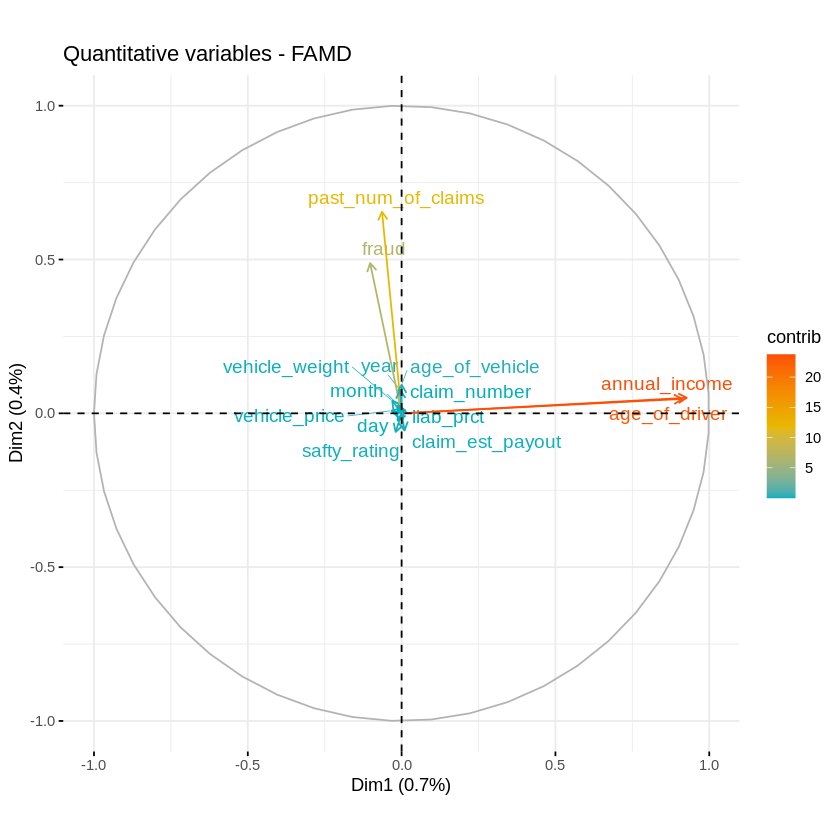

In [142]:
fviz_famd_var(famd, "quanti.var", col.var = "contrib",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE)


In [ ]:
# The enhanced FAMD plot illustrates the contributions of quantitative variables to the two dimensions, Dim1 (5.5%) and Dim2 (3.2%), with a color gradient
# indicating their significance. annual_income and age_of_driver, shown in red, are significant contributors to Dim1, highlighting the importance of socio-economic
#factors. past_num_of_claims, marked in yellow, is a major contributor to Dim2, emphasizing the relevance of claims history. Other variables, such as vehicle_weight,
#age_of_vehicle, and claim_est_payout, cluster near the origin in blue, indicating lesser contributions. This visualization provides a clear depiction of which variables
# are most influential in explaining the variability in the data, with socio-economic factors and claims history being the primary drivers.